In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('pl_sp_orders_q1_full_last_version.dsv', sep=';', low_memory=False)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977783 entries, 0 to 977782
Data columns (total 38 columns):
SCM_N_ORDER_POS_NR              977783 non-null int64
SCM_N_ORDER_NR                  977783 non-null int64
TDT_T_KEY_ORDER_DATE            977783 non-null object
THR_C_KEY_ORDER_HOUR            977783 non-null object
SIT_N_KEY_SITE                  977783 non-null int64
CUS_N_KEY_CUSTOMER              977783 non-null int64
SCM_SALES_BMF                   977783 non-null object
SCM_SALES_CANCEL_BMF            977783 non-null object
SCM_D_FINANCE_CM1               977783 non-null object
SCM_D_FINANCE_CM2               977783 non-null object
SCM_D_ORIG_FINANCE_ORDER_NET    977783 non-null object
SCM_AP_ID                       977783 non-null int64
SCM_AS_ID                       977783 non-null int64
SCM_MASTER_AP_ID                977783 non-null int64
SCM_IS_ZSP_ORDER                977783 non-null int64
SCM_C_ORDER_STATUS              977783 non-null object
CTP_N_KEY_CUSTOME

In [5]:
data.head()

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,...,CZP_EXPIRY_DATE,CZP_ZTQ_ID,CZP_PERCENTAGE,CZP_PRICE,ORF_EXT_O_ID,ORF_EXT_K_ID,ORF_EXT_ROOT_K_ID,OP_AS_ID,OP_BONUSPOINTS,BP_TYP
0,433404910,101587591,01/01/18,19:47,8,16634160,"1,8736",0,"0,9532","0,7816",...,23/05/18,53,5,"3,7",101587591,16634160,16634160,1371800,0,NaN
1,433404917,101587591,01/01/18,19:47,8,16634160,"1,153",0,"0,5574","0,3891",...,23/05/18,53,5,"3,7",101587591,16634160,16634160,1604454,0,NaN
2,433321835,101567759,01/01/18,14:53,8,3964305,"6,6776",0,"2,6229","1,4391",...,14/07/18,51,3,"2,45",101567759,3964305,3964305,2169256,0,NaN
3,433321832,101567759,01/01/18,14:53,8,3964305,"17,1022",0,"1,9154","-1,8614",...,14/07/18,51,3,"2,45",101567759,3964305,3964305,2169797,0,NaN
4,433321833,101567759,01/01/18,14:53,8,3964305,"9,1276",0,"1,2915","-0,7252",...,14/07/18,51,3,"2,45",101567759,3964305,3964305,1618885,0,NaN


In [6]:
data['ORDER_DATETIME'] = pd.to_datetime(data['TDT_T_KEY_ORDER_DATE'] + ' ' + data['THR_C_KEY_ORDER_HOUR'] + ':00', 
                                        format="%d/%m/%y %H:%M:%S")

In [7]:
data['TDT_T_KEY_ORDER_DATE'] = pd.to_datetime(data['TDT_T_KEY_ORDER_DATE'], format="%d/%m/%y")

In [8]:
data['CZP_START_DATE'] = pd.to_datetime(data['CZP_START_DATE'], format="%d/%m/%y")
data['CZP_EXPIRY_DATE'] = pd.to_datetime(data['CZP_EXPIRY_DATE'], format="%d/%m/%y")

In [9]:
lista = [float(str(i).replace(',','.')) for i in data['SCM_SALES_BMF'].values]
data['SCM_SALES_BMF'] = lista

In [10]:
lista0 = [float(str(i).replace(',','.')) for i in data['SCM_D_ORIG_FINANCE_ORDER_NET'].values]
data['SCM_D_ORIG_FINANCE_ORDER_NET'] = lista0

In [11]:
data['FINANCE_ORDER_NET'] = data['SCM_D_ORIG_FINANCE_ORDER_NET'].groupby(data['SCM_N_ORDER_NR']).transform('sum')

In [12]:
lista1 = [float(str(i).replace(',','.')) for i in data['SCM_SALES_CANCEL_BMF'].values]
data['SCM_SALES_CANCEL_BMF'] = lista1

In [13]:
lista2 = [float(str(i).replace(',','.')) for i in data['SCM_D_FINANCE_CM1'].values]
data['SCM_D_FINANCE_CM1'] = lista2

In [14]:
lista3 = [float(str(i).replace(',','.')) for i in data['SCM_D_FINANCE_CM2'].values]
data['SCM_D_FINANCE_CM2'] = lista3

In [15]:
lista4 = [float(str(i).replace(',','.')) for i in data['CZP_PRICE'].values]
data['CZP_PRICE'] = lista4

In [16]:
data['REL_CM1'] = data['SCM_D_FINANCE_CM1'] / data['FINANCE_ORDER_NET'] * 100

In [17]:
data['REL_CM2'] = data['SCM_D_FINANCE_CM2'] / data['FINANCE_ORDER_NET'] * 100

In [18]:
#Convert date to calendar week number and month number
data['WEEK_NUMBER'] = data['TDT_T_KEY_ORDER_DATE'].dt.week
data['MONTH_NUMBER'] = data['TDT_T_KEY_ORDER_DATE'].dt.month

In [19]:
len(data), len(data['SCM_N_ORDER_NR'].unique())

(977783, 151483)

In [20]:
#CHECK DUPLICATED ROWS

In [21]:
dupl_mask = [len(i) > 1 for i in data.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique().values]

In [22]:
len(dupl_mask), sum(dupl_mask)

(151483, 372)

In [23]:
dup_orders = data.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique()[dupl_mask].index.values

In [24]:
dup_orders[:10]

array([101757736, 102034723, 102627138, 102630191, 102897606, 103093884,
       103357152, 103536937, 103612279, 103769751], dtype=int64)

In [25]:
len(dup_orders)

372

In [26]:
len(data[data['SCM_N_ORDER_NR'].isin(dup_orders)])

5932

In [27]:
cust_2_dup_orders = data[data['SCM_N_ORDER_NR'].isin(dup_orders)].groupby('CUS_N_KEY_CUSTOMER')['SCM_N_ORDER_NR'].nunique()[\
data[data['SCM_N_ORDER_NR'].isin(dup_orders)].groupby('CUS_N_KEY_CUSTOMER')['SCM_N_ORDER_NR'].nunique() > 1].index.values

In [28]:
cust_2_dup_orders

array([ 8580610,  9926635, 10350477, 12251062], dtype=int64)

In [29]:
data[(data['CUS_N_KEY_CUSTOMER'].isin(cust_2_dup_orders)) & (data['SCM_N_ORDER_NR'].isin(dup_orders))]['SCM_N_ORDER_NR'].unique()

array([106990750, 107020223, 107307402, 107315294, 107315141, 107305050,
       107691141, 107690849], dtype=int64)

In [30]:
#Let's get incorrect duplicated indexes instead of order_id to exclude them and select the correct data subset
dup_indexes = []

for i in dup_orders:
    o_id = data[data['SCM_N_ORDER_NR'] == i]
    if o_id['CUS_N_KEY_CUSTOMER'].unique() not in cust_2_dup_orders:
        sp_dates = o_id['CZP_START_DATE'].value_counts().index.values
        min_date = o_id[o_id['CZP_START_DATE'] < max(sp_dates)]
        dup_indexes.append(min_date.index.values)

In [31]:
len(dup_indexes)

364

In [32]:
for c in cust_2_dup_orders:
    #print('Customer', c)
    cust_orders = data[(data['CUS_N_KEY_CUSTOMER'] == c) & (data['SCM_N_ORDER_NR'].isin(dup_orders))]
    if cust_orders['SCM_IS_ZSP_ORDER'].sum() >= 1:
        #print('SP Sold')
        sp_datetime = cust_orders[cust_orders['SCM_MASTER_AP_ID'] == 42225]['ORDER_DATETIME'].unique()[0]
        if (o_id['ORDER_DATETIME'] < sp_datetime).sum() > 0:
            #print('One order before SP')
            before = cust_orders[cust_orders['ORDER_DATETIME'] < sp_datetime]
            sp_dates_b = before['CZP_START_DATE'].value_counts().index.values
            max_date_b = before[before['CZP_START_DATE'] > min(sp_dates)]
            max_dates_b = list(max_date_b.index.values)
            
            after = o_id[o_id['ORDER_DATETIME'] >= sp_datetime]
            sp_dates_a = after['CZP_START_DATE'].value_counts().index.values
            min_date_a = after[after['CZP_START_DATE'] < max(sp_dates)]
            min_dates_a = list(min_date_a.index.values)
            
            indexes_date_not_valid = max_dates_b + min_dates_a
            dup_indexes.append(indexes_date_not_valid)
        elif (o_id['ORDER_DATETIME'] < sp_datetime).sum() == 0:
            #print('One order after SP')
            sp_dates = cust_orders['CZP_START_DATE'].value_counts().index.values
            min_date = cust_orders[cust_orders['CZP_START_DATE'] < max(sp_dates)]
            dup_indexes.append(min_date.index.values)
        else:
            print('Something go wrong')
    elif cust_orders['SCM_IS_ZSP_ORDER'].sum() == 0:
        #print('No SP Sold')
        sp_dates = cust_orders['CZP_START_DATE'].value_counts().index.values
        min_date = cust_orders[cust_orders['CZP_START_DATE'] < max(sp_dates)]
        dup_indexes.append(min_date.index.values)

In [33]:
len(dup_indexes)

368

In [34]:
#Get a flatten list of indexes
dupl_ind = [i for lista in dup_indexes for i in lista]

In [35]:
len(dupl_ind)

2966

In [36]:
exclude_data = data.index.isin(dupl_ind)

In [37]:
data = data[~exclude_data]

In [38]:
len(data)

974817

In [39]:
sum(len(i) > 1 for i in data.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique().values)

0

In [40]:
ztq = [51, 52, 53, 54, 55, 56]

## Gathering metrics

In [41]:
metrics_ztq = pd.DataFrame(columns=['ZTQ','active_customers', 'orders', 'sales_bmf', 'net_sales', 'CM1', 'CM2', 'CM1%', 'CM2%',
                                   'discount_amount', 'orders_%_neg_cm1', 'loss_in_CM1', 'orders_%_neg_cm2', 'loss_in_CM2'])
for tq in ztq:
    df_elems = []
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    #print('*** Tier ', tq, '***')
    df_elems.append(tq)
    #print('Active customers in selected period: ', data_tier['CUS_N_KEY_CUSTOMER'].nunique())
    df_elems.append(data_tier['CUS_N_KEY_CUSTOMER'].nunique())
    #print('Total orders placed: ', data_tier['SCM_N_ORDER_NR'].nunique())
    df_elems.append(data_tier['SCM_N_ORDER_NR'].nunique())
    #print('Total sales BMF: ', (data_tier['SCM_SALES_BMF'] - data_tier['SCM_SALES_CANCEL_BMF']).sum())
    df_elems.append((data_tier['SCM_SALES_BMF'] - data_tier['SCM_SALES_CANCEL_BMF']).sum())
    #print('Total net sales: ', data_tier.groupby('SCM_N_ORDER_NR')['OSP_NET_VALUE'].mean().sum())
    df_elems.append(data_tier.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum())
    #print('Total CM1: ', data_tier['SCM_D_FINANCE_CM1'].sum())
    df_elems.append(data_tier['SCM_D_FINANCE_CM1'].sum())
    #print('Total CM2: ', data_tier['SCM_D_FINANCE_CM2'].sum())
    df_elems.append(data_tier['SCM_D_FINANCE_CM2'].sum())
    #print('Total CM1%: ', data_tier['SCM_D_FINANCE_CM1'].sum() / data_tier.groupby('SCM_N_ORDER_NR')['OSP_NET_VALUE'].mean().sum() * 100)
    df_elems.append(data_tier['SCM_D_FINANCE_CM1'].sum() / data_tier.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
    #print('Total CM2%: ', data_tier['SCM_D_FINANCE_CM2'].sum() / data_tier.groupby('SCM_N_ORDER_NR')['OSP_NET_VALUE'].mean().sum() * 100)
    df_elems.append(data_tier['SCM_D_FINANCE_CM2'].sum() / data_tier.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
    #print('-----')
    #print('Total discount given by ZP: ', (data_tier[data_tier['SCM_MASTER_AP_ID'] == 42715]['SCM_SALES_BMF'] - \
    #                                        data_tier[data_tier['SCM_MASTER_AP_ID'] == 42715]['SCM_SALES_CANCEL_BMF']).sum())
    df_elems.append((data_tier[data_tier['SCM_MASTER_AP_ID'] == 42715]['SCM_SALES_BMF'] - \
                                            data_tier[data_tier['SCM_MASTER_AP_ID'] == 42715]['SCM_SALES_CANCEL_BMF']).sum())
    #print('-----')
    cm1_per_order = data_tier.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()
    cm1_per_order[cm1_per_order <= 0].sum()
    orders_neg_cm1 = cm1_per_order[cm1_per_order <= 0].index.values
    
    #print('Total orders with negative CM1: ', len(orders_neg_cm1))
    #print('% Orders with negative CM1: ', len(orders_neg_cm1)/data_tier['SCM_N_ORDER_NR'].nunique()*100)
    df_elems.append(len(orders_neg_cm1)/data_tier['SCM_N_ORDER_NR'].nunique()*100)
    #print('Total loss in CM1: ', cm1_per_order[cm1_per_order <= 0].sum())
    df_elems.append(cm1_per_order[cm1_per_order <= 0].sum())
    
    cm2_per_order = data_tier.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()
    cm2_per_order[cm2_per_order <= 0].sum()
    orders_neg_cm2 = cm2_per_order[cm2_per_order <= 0].index.values
    orders_only_neg_cm2 = data_tier[~data_tier['SCM_N_ORDER_NR'].isin(orders_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()\
    [data_tier[~data_tier['SCM_N_ORDER_NR'].isin(orders_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum() <= 0]
    orders_only_neg_cm2.sum()
    
    #print('Total orders with negative CM2: ', len(orders_neg_cm2))
    #print('% Orders with negative CM2: ', len(orders_neg_cm2)/data_tier['SCM_N_ORDER_NR'].nunique()*100)
    df_elems.append(len(orders_neg_cm2)/data_tier['SCM_N_ORDER_NR'].nunique()*100)
    #print('Total loss in CM2: ', cm2_per_order[cm2_per_order <= 0].sum())
    df_elems.append(cm2_per_order[cm2_per_order <= 0].sum())
    
    #print('....................................................................................................................')
    #print('....................................................................................................................')
    new_row = pd.DataFrame.from_records([df_elems], columns=metrics_ztq.columns)
    metrics_ztq = metrics_ztq.append(new_row, ignore_index=True)

+ active_customers: different customer_id placing orders
+ orders: total orders amount in the tier
+ CM1: total CM1 in the tier
+ CM2: total CM2 in the tier
+ CM1%: CM1/net_sales
+ CM2%: CM2/net_sales
+ discount_amount: discount provided due to SP
+ orders_%_neg_cm1: % of orders having negative CM1 
+ loss_in_CM1: CM1 sum from orders having negative CM1
+ orders_%_neg_cm2: % of orders having negative CM2 
+ loss_in_CM2: CM2 sum from orders having negative CM2

In [42]:
metrics_ztq.round(2)

,ZTQ,active_customers,orders,sales_bmf,net_sales,CM1,CM2,CM1%,CM2%,discount_amount,orders_%_neg_cm1,loss_in_CM1,orders_%_neg_cm2,loss_in_CM2
0,51,19313,52577,2539538.92,2320959.66,495584.30,261951.69,21.35,11.29,-78526.46,0.98,-1224.50,14.11,-14463.63
1,52,10116,29736,1639518.39,1494308.67,302856.73,163464.65,20.27,10.94,-50662.16,1.58,-1729.40,16.31,-11039.88
2,53,8194,22384,1135960.98,1035791.74,219567.00,120065.55,21.20,11.59,-59770.17,1.61,-1057.94,18.07,-9010.95
3,54,6334,20084,1217351.39,1111197.70,204037.97,104178.70,18.36,9.38,-64150.02,2.68,-2204.11,23.78,-12193.07
4,55,995,1978,81796.55,74406.55,16285.95,8254.22,21.89,11.09,-1691.32,0.10,-3.19,14.91,-444.50
5,56,11033,24723,1221685.49,1111201.36,209267.75,97616.78,18.83,8.78,-50703.85,1.44,-1800.56,22.40,-12364.11


In [43]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [44]:
metrics_ztq.round(2).style.apply(highlight_max)

,ZTQ,active_customers,orders,sales_bmf,net_sales,CM1,CM2,CM1%,CM2%,discount_amount,orders_%_neg_cm1,loss_in_CM1,orders_%_neg_cm2,loss_in_CM2
0,51,19313,52577,2.53954e+06,2.32096e+06,495584,261952,21.35,11.29,-78526.5,0.98,-1224.5,14.11,-14463.6
1,52,10116,29736,1.63952e+06,1.49431e+06,302857,163465,20.27,10.94,-50662.2,1.58,-1729.4,16.31,-11039.9
2,53,8194,22384,1.13596e+06,1.03579e+06,219567,120066,21.2,11.59,-59770.2,1.61,-1057.94,18.07,-9010.95
3,54,6334,20084,1.21735e+06,1.1112e+06,204038,104179,18.36,9.38,-64150,2.68,-2204.11,23.78,-12193.1
4,55,995,1978,81796.6,74406.6,16286,8254.22,21.89,11.09,-1691.32,0.1,-3.19,14.91,-444.5
5,56,11033,24723,1.22169e+06,1.1112e+06,209268,97616.8,18.83,8.78,-50703.8,1.44,-1800.56,22.4,-12364.1


<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
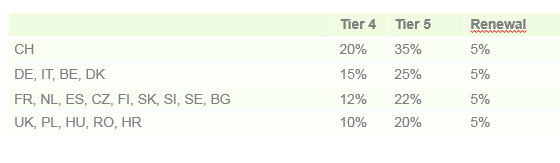

- CM1% lower for tiers 54 and 56.
- high % of CM1 and CM2 negative orders in Tier 54 compared with the others

## Behaviour per Tier

Histograms show frequencies from data values in a sample. We will see those for order number (order_ko_count_net, meaning the nth order the customer has placed) and other one based on basket value.

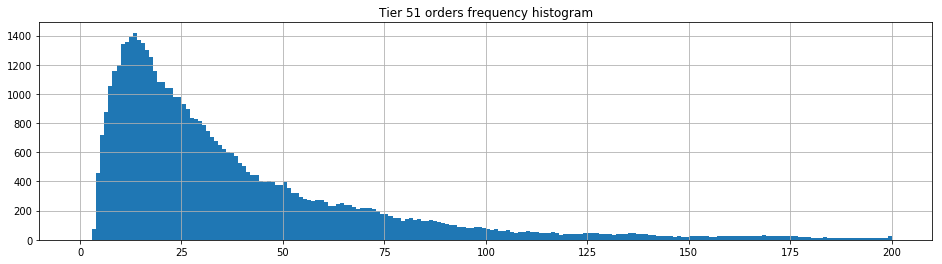

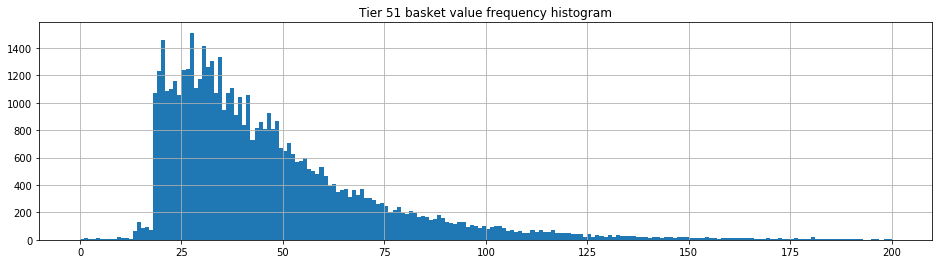

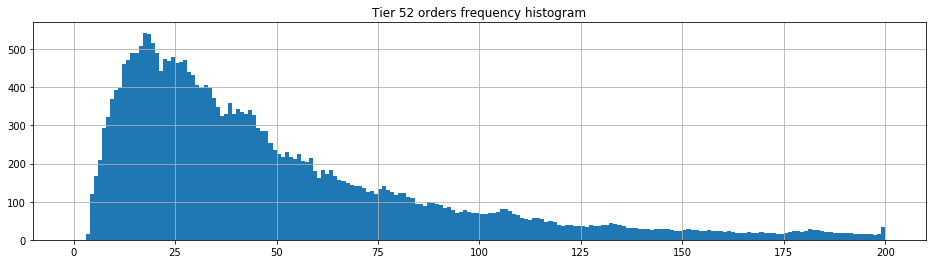

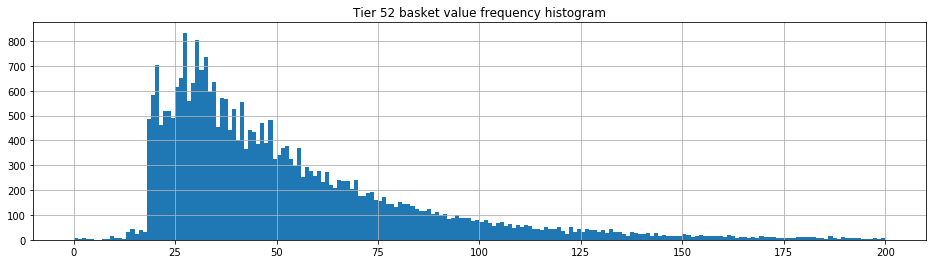

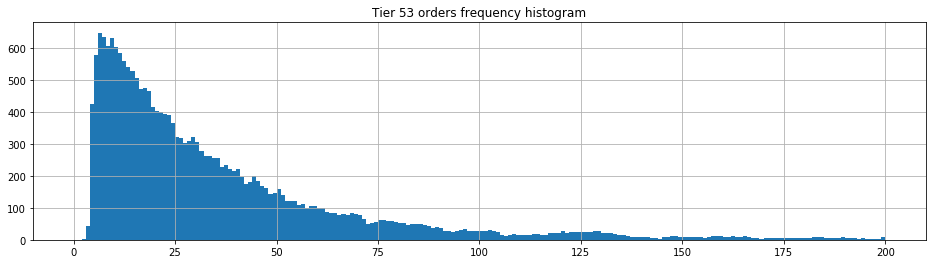

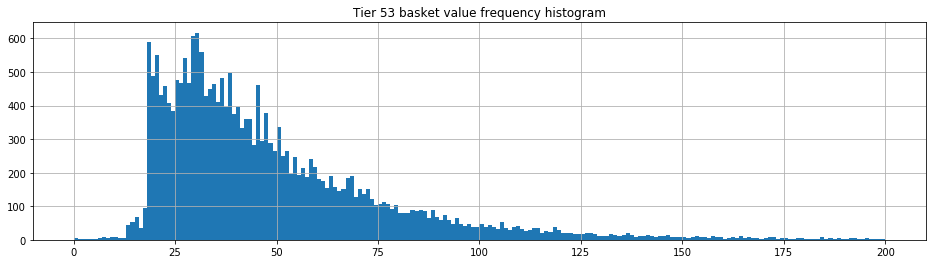

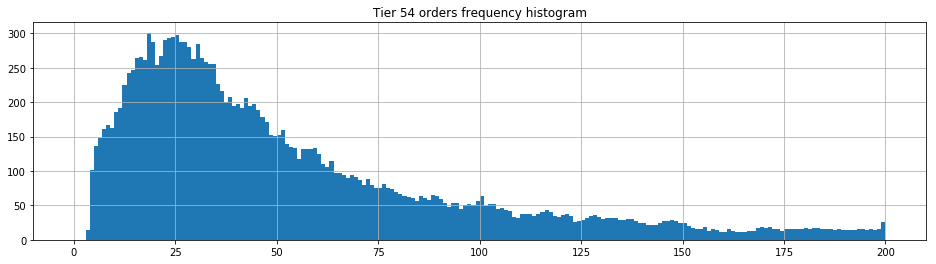

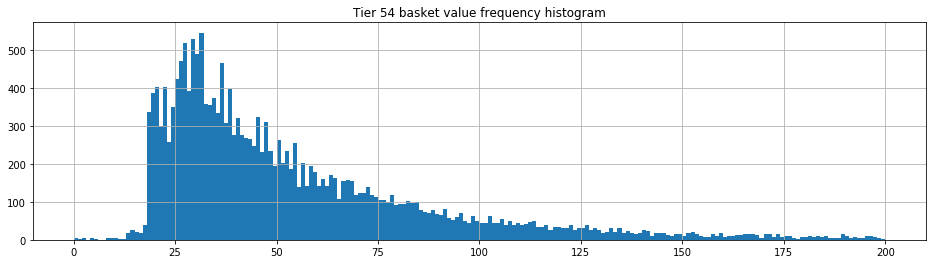

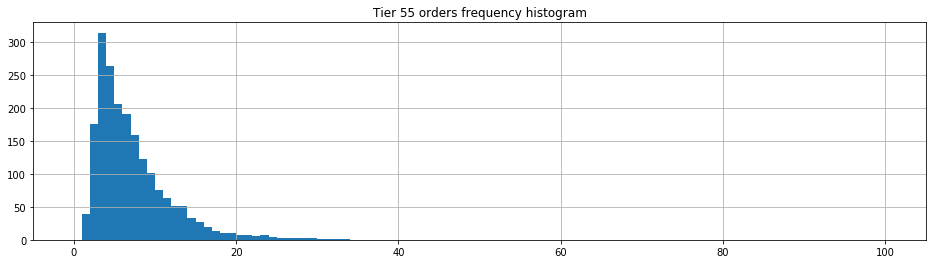

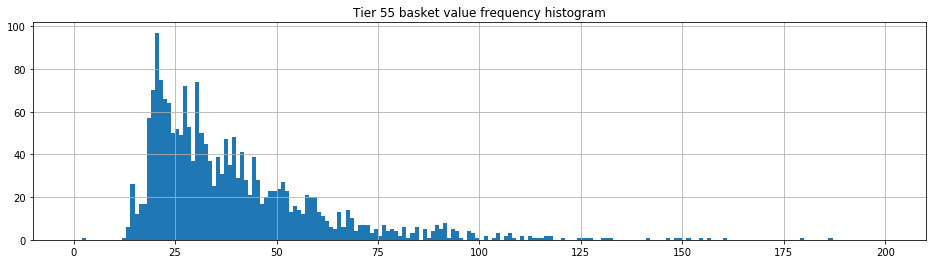

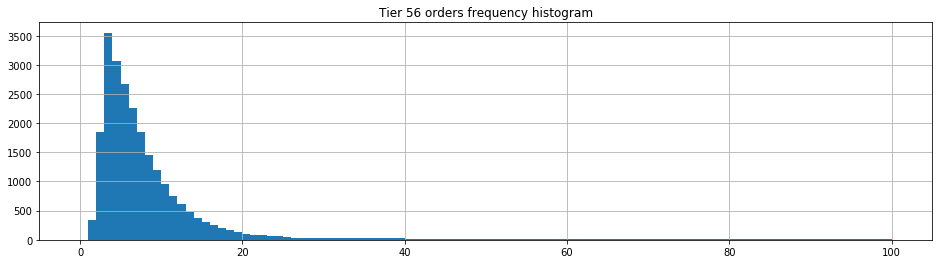

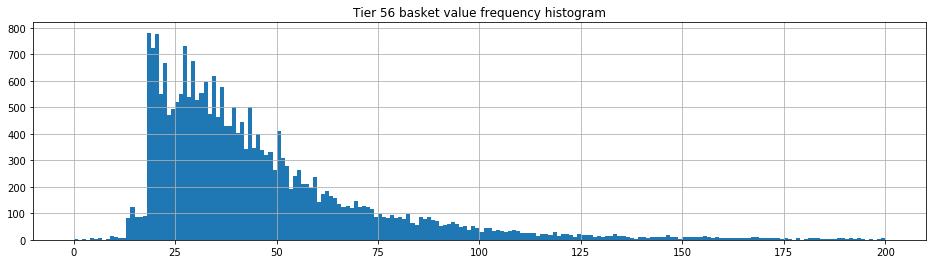

In [45]:
orders_summary = pd.DataFrame(columns = ['ZTQ', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])
basket_value_summary = pd.DataFrame(columns = ['ZTQ', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])

for tq in ztq:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    if tq in [51, 52, 53, 54]:
        plt.figure(figsize=(16,4))
        #plt.subplot(211)
        order_ko_count_net = data_tier.groupby('SCM_N_ORDER_NR', as_index=False)['OSP_KO_COUNT_NET'].mean()
        order_ko_count_net['OSP_KO_COUNT_NET'].hist(bins=200, range=(0, 200))
        title = 'Tier ' + str(tq) + ' orders frequency histogram'
        plt.title(title)
        plt.show()
        ord_values = list(order_ko_count_net['OSP_KO_COUNT_NET'].describe().values)
        new_row = pd.DataFrame.from_records([[tq] +  ord_values], columns=orders_summary.columns)
        orders_summary = orders_summary.append(new_row, ignore_index=True)
        
        plt.figure(figsize=(16,4))
        #plt.subplot(212)
        sales_per_order = data_tier.groupby('SCM_N_ORDER_NR')['SCM_SALES_BMF'].sum() -\
        data_tier.groupby('SCM_N_ORDER_NR')['SCM_SALES_CANCEL_BMF'].sum()
        sales_per_order.hist(bins=200, range=(0, 200))
        title = 'Tier ' + str(tq) + ' basket value frequency histogram'
        plt.title(title)
        plt.show()
        basket_values = list(sales_per_order.describe().values)
        new_row = pd.DataFrame.from_records([[tq] +  basket_values], columns=basket_value_summary.columns)
        basket_value_summary = basket_value_summary.append(new_row, ignore_index=True)
        
    else:
        plt.figure(figsize=(16,4))
        #plt.subplot(211)
        order_ko_count_net = data_tier.groupby('SCM_N_ORDER_NR', as_index=False)['OSP_KO_COUNT_NET'].mean()
        order_ko_count_net['OSP_KO_COUNT_NET'].hist(bins=100, range=(0, 100))
        title = 'Tier ' + str(tq) + ' orders frequency histogram'
        plt.title(title)
        plt.show()
        ord_values = list(order_ko_count_net['OSP_KO_COUNT_NET'].describe().values)
        new_row = pd.DataFrame.from_records([[tq] +  ord_values], columns=orders_summary.columns)
        orders_summary = orders_summary.append(new_row, ignore_index=True)
        
        plt.figure(figsize=(16,4))
        #plt.subplot(212)
        sales_per_order = data_tier.groupby('SCM_N_ORDER_NR')['SCM_SALES_BMF'].sum() -\
        data_tier.groupby('SCM_N_ORDER_NR')['SCM_SALES_CANCEL_BMF'].sum()
        sales_per_order.hist(bins=200, range=(0, 200))
        title = 'Tier ' + str(tq) + ' basket value frequency histogram'
        plt.title(title)
        plt.show()
        basket_values = list(sales_per_order.describe().values)
        new_row = pd.DataFrame.from_records([[tq] +  basket_values], columns=basket_value_summary.columns)
        basket_value_summary = basket_value_summary.append(new_row, ignore_index=True)

And gather them into two tables...

In [46]:
#ORDERS HISTOGRAM SUMMARY
orders_summary.round(2).style.apply(highlight_max)

,ZTQ,count,mean,std,min,25%,50%,75%,max
0,51,52577,47.41,79.75,3,15,27,51,1343
1,52,29736,91.22,228.65,3,22,40,77,2318
2,53,22384,62.94,155.09,2,13,26,51,2115
3,54,20084,109.84,165.21,3,25,47,107,1049
4,55,1978,6.73,4.68,1,3,5,9,33
5,56,24723,13,29.31,1,4,6,10,363


In [47]:
#BASKET VALUE HISTOGRAM SUMMARY
basket_value_summary.round(2).style.apply(highlight_max)

,ZTQ,count,mean,std,min,25%,50%,75%,max
0,51,52577,48.3,39.04,0,28.41,39.73,57.6,4367.83
1,52,29736,55.14,41.6,0,30.2,43.6,66.65,1120.66
2,53,22384,50.75,38.27,0,28.96,40.82,60.75,877.61
3,54,20084,60.61,57.71,0.51,30.2,44.36,70.73,1378.07
4,55,1978,41.35,33.26,2.47,23.84,32.95,48.12,410.32
5,56,24723,49.41,63.48,-1.29,27.24,38.37,55.96,3410.44


**Existing customers:**

- Resellers activity in existing customers tiers.
- Tier 53 performing closer to Tier 51 in both, buying frequency and basket value (analysis going through criteria for renewals).

**New customers:**

- Resellers activity also probably in Tier 56
- Average basket value for Tier 55 and 56 a little lower...especially when looking at the median (Quartile 2, 50%). In case of having data with outliers (resellers) is a more robust statistic.

### Locate and quantify unprofitable  CM1 orders in absolute and relative terms regarding PG3 and PG4 levels per Tier

In [48]:
ord_cm1 = data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()

In [49]:
ord_neg_cm1 = ord_cm1[ord_cm1 <= 0].index.values

In [50]:
data['IS_CM1_NEG_ORDER'] = data['SCM_N_ORDER_NR'].isin(ord_neg_cm1) * 1

In [51]:
ord_coupon = data[data['SCM_MASTER_AP_ID'] == 6169]['SCM_N_ORDER_NR'].unique()

In [52]:
data['ORDER_HAS_COUPON'] = data['SCM_N_ORDER_NR'].isin(ord_coupon) * 1

In [53]:
data['BP_TYP'].unique()

array([nan, 'B '], dtype=object)

In [54]:
ord_bp = data[data['BP_TYP'] == 'B ']['SCM_N_ORDER_NR'].unique()

In [55]:
ord_bp

array([101584585, 101593130, 101584563, ..., 107777013, 107776439,
       107781225], dtype=int64)

In [56]:
data['ORDER_HAS_BP'] = data['SCM_N_ORDER_NR'].isin(ord_bp) * 1

In [57]:
data['ORDER_HAS_C+BP'] = data['ORDER_HAS_COUPON'] * data['ORDER_HAS_BP']

In [58]:
import cx_Oracle

In [59]:
data['OSP_3_LEAD_P_PG_ID'].fillna(0).unique()

array([  2068,    857,    251,     15,   2192,    252,    301,     33,
           18,     47,     29,     34,     37, 153317,   1400,      9,
           23,   2190,    305, 183134,     38,    409,     45,    221,
           36,   2471,     20,   1540,  49828,    274,   2155,     16,
           62,     67,    741,  40023,     68, 127130, 126729,    401,
           51,    758,     42,     65,     48,   1603,    484, 255413,
       126778,  49821], dtype=int64)

In [60]:
pg3_l = list(data['OSP_3_LEAD_P_PG_ID'].fillna(0).unique())

In [61]:
pg3_list = repr(pg3_l).replace('[','(').replace(']',')') 

In [62]:
query = """select pg_id, pg_shortlink from ZOOMAN.PRODUCT_GROUPS
where pg_id in %s""" % pg3_list

In [63]:
conn = cx_Oracle.connect('zooor', 'zoo12or', 'zoorep', threaded=True, encoding = "UTF-8", nencoding = "UTF-8")
curs = conn.cursor()
pg3 = pd.read_sql(query, con = conn)
conn.close()

In [64]:
pg3_dict = {key: value for (key, value) in zip(pg3['PG_ID'], pg3['PG_SHORTLINK'])}

In [65]:
pg3_dict[0] = 'null'

In [66]:
lista_pg3 = [pg3_dict[i] for i in data['OSP_3_LEAD_P_PG_ID'].fillna(0)]

In [67]:
len(lista_pg3), len(data['OSP_3_LEAD_P_PG_ID'])

(974817, 974817)

In [68]:
data['LEAD_PG3_NAME'] = lista_pg3

In [69]:
pg4_l = list(data['OSP_4_LEAD_P_PG_ID'].fillna(0).unique())

In [70]:
0 in pg4_l

False

In [71]:
pg4_list = repr(pg4_l).replace('[','(').replace(']',')') 

In [72]:
query = """select pg_id, pg_shortlink from ZOOMAN.PRODUCT_GROUPS
where pg_id in %s""" % pg4_list

In [73]:
conn = cx_Oracle.connect('zooor', 'zoo12or', 'zoorep', threaded=True, encoding = "UTF-8", nencoding = "UTF-8")
curs = conn.cursor()
pg4 = pd.read_sql(query, con = conn)
conn.close()

In [74]:
pg4_dict = {key: value for (key, value) in zip(pg4['PG_ID'], pg4['PG_SHORTLINK'])}

In [75]:
pg4_dict[-1] = 'null'

In [76]:
lista_pg4 = [pg4_dict[i] for i in data['OSP_4_LEAD_P_PG_ID'].fillna(-1)]

In [77]:
len(lista_pg4), len(data['OSP_4_LEAD_P_PG_ID'])

(974817, 974817)

In [78]:
data['LEAD_PG4_NAME'] = lista_pg4

In [79]:
from IPython.display import display

+ OSP_3_LEAD_P_PG_ID
+ LEAD_PG3_NAME
+ OSP_4_LEAD_P_PG_ID
+ LEAD_PG4_NAME
+ IS_CM1_NEG_ORDER: flag 0-1, grouping all negative or positive orders regarding to CM1
+ SCM_N_ORDER_NR: orders amount for the corresponding flag
+ ORDERS_IN_PG: orders in product group (orders in flag 0, positives, plus orders in flag 1, negatives)
+ PERC_%_IN_PG: SCM_N_ORDER_NR / ORDERS_IN_PG
+ ORDER_HAS_COUPON: total orders using coupons
+ COUPONS_IN_PG: total coupons used in product group
+ COUPONS_%_IN_PG: ORDER_HAS_COUPON / COUPONS_IN_PG
+ ORDER_HAS_BP: total orders using coupons
+ BP_IN_PG: total orders having bonuspoints as payment in product group
+ BP_%_IN_PG: ORDER_HAS_BP / BP_IN_PG
+ SCM_D_FINANCE_CM1: CM1 sum from the orders in the flag
+ PERC_%_TOTAL_LOSS: CM1 sum divided by the total loss CM1 (sum CM1 for all negative CM1 orders)

In [80]:
orders_CM1 = data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()
orders_CM1_neg = orders_CM1[orders_CM1 <= 0].index.values
print('Total orders: ', len(orders_CM1))
print('Total orders with negative CM1: ', len(orders_CM1_neg))
print('% of negative CM1 orders: ', len(orders_CM1_neg) / len(orders_CM1) * 100)
print('Total loss of CM1 (sum CM1 for all negative CM1 orders): ', orders_CM1[orders_CM1 <= 0].sum())
print('........................................................................................')
print('')
print('Unprofitable CM1 orders per Lead PG3 [Top 20]')
grp = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], 
                            as_index=False)['SCM_D_FINANCE_CM1'].sum()
grp_c = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], 
                              as_index=False)['ORDER_HAS_COUPON'].mean()
grp_bp = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], 
                              as_index=False)['ORDER_HAS_BP'].mean()
grp_cbp = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], 
                              as_index=False)['ORDER_HAS_C+BP'].mean()
df1 = grp.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER'], as_index=False)['SCM_D_FINANCE_CM1'].sum()
df2 = grp.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER'], as_index=False)['SCM_N_ORDER_NR'].count()
dfc = grp_c.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_COUPON'].sum()
dfbp = grp_bp.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_BP'].sum()
dfbpc = grp_cbp.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_C+BP'].sum()
df3 = pd.merge(df1, df2, left_index=True, right_index=True, copy=False)
dfcbp = pd.merge(dfc, dfbp, left_index=True, right_index=True, copy=False)
df3cbp = pd.merge(df3, dfcbp, left_index=True, right_index=True, copy=False)
df_c_bp = pd.merge(df3cbp, dfbpc, left_index=True, right_index=True, copy=False)
df_c_bp = df_c_bp[['OSP_3_LEAD_P_PG_ID_x_x', 'LEAD_PG3_NAME_x_x', 'IS_CM1_NEG_ORDER_x_x', 'SCM_N_ORDER_NR',
                 'ORDER_HAS_COUPON', 'ORDER_HAS_BP', 'ORDER_HAS_C+BP', 'SCM_D_FINANCE_CM1']]
df_c_bp.columns = ['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER', 'SCM_N_ORDER_NR', 
                    'ORDER_HAS_COUPON', 'ORDER_HAS_BP', 'ORDER_HAS_C+BP', 'SCM_D_FINANCE_CM1']
df_c_bp['ORDERS_IN_PG'] = df_c_bp.groupby('OSP_3_LEAD_P_PG_ID')['SCM_N_ORDER_NR'].transform('sum')
df_c_bp['PERC_%_IN_PG'] = df_c_bp['SCM_N_ORDER_NR'] / df_c_bp['ORDERS_IN_PG'] * 100
df_c_bp['COUPONS_IN_PG'] = df_c_bp.groupby('OSP_3_LEAD_P_PG_ID')['ORDER_HAS_COUPON'].transform('sum')
#df3cbp['COUPONS_%_IN_PG'] = df3cbp['ORDER_HAS_COUPON'] / df3cbp['COUPONS_IN_PG'] * 100
df_c_bp['BP_IN_PG'] = df_c_bp.groupby('OSP_3_LEAD_P_PG_ID')['ORDER_HAS_BP'].transform('sum')
#df3cbp['BP_%_IN_PG'] = df3cbp['ORDER_HAS_BP'] / df3cbp['BP_IN_PG'] * 100
df_c_bp['C+BP_IN_PG'] = df_c_bp.groupby('OSP_3_LEAD_P_PG_ID')['ORDER_HAS_C+BP'].transform('sum')
df_c_bp['PERC_%_TOTAL_LOSS'] = df_c_bp['SCM_D_FINANCE_CM1'] / orders_CM1[orders_CM1 <= 0].sum() * 100
df_c_bp = df_c_bp[['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'IS_CM1_NEG_ORDER', 'SCM_N_ORDER_NR','ORDERS_IN_PG', 'PERC_%_IN_PG',
              'ORDER_HAS_COUPON', 'COUPONS_IN_PG', #'COUPONS_%_IN_PG', 
              'ORDER_HAS_BP', 'BP_IN_PG', #'BP_%_IN_PG',
              'ORDER_HAS_C+BP', 'C+BP_IN_PG', 'SCM_D_FINANCE_CM1', 'PERC_%_TOTAL_LOSS']]
display(df_c_bp.round(2).sort_values(by='SCM_D_FINANCE_CM1').head(20))
print('........................................................................................')
print('')
print('Unprofitable CM1 orders per Lead PG4 [Top 20]')
grp_2 = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                               'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], as_index=False)['SCM_D_FINANCE_CM1'].sum()
grp_2c = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME','OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                               'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_COUPON'].mean()
grp_2b = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME','OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                               'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_BP'].mean()
grp_2cb = data.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME','OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                               'SCM_N_ORDER_NR', 'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_C+BP'].mean()
df1_2 = grp_2.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME','OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                           'IS_CM1_NEG_ORDER'], as_index=False)['SCM_D_FINANCE_CM1'].sum()
df2_2 = grp_2.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME','OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                           'IS_CM1_NEG_ORDER'], as_index=False)['SCM_N_ORDER_NR'].count()
dfc_2 = grp_2c.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                            'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_COUPON'].sum()
dfbp_2 = grp_2b.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                            'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_BP'].sum()
dfcbp_2 = grp_2cb.groupby(['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME',
                            'IS_CM1_NEG_ORDER'], as_index=False)['ORDER_HAS_C+BP'].sum()
df4 = pd.merge(df1_2, df2_2, left_index=True, right_index=True, copy=False)
dfc_2 = pd.merge(dfc_2, dfbp_2, left_index=True, right_index=True, copy=False)
df4c = pd.merge(df4, dfc_2, left_index=True, right_index=True, copy=False)
df4c = pd.merge(df4c, dfcbp_2, left_index=True, right_index=True, copy=False)
df4c = df4c[['OSP_3_LEAD_P_PG_ID_x_x', 'LEAD_PG3_NAME_x_x', 'OSP_4_LEAD_P_PG_ID_x_x', 'LEAD_PG4_NAME_x_x', 'IS_CM1_NEG_ORDER_x_x',
                 'SCM_N_ORDER_NR', 'ORDER_HAS_COUPON', 'ORDER_HAS_BP', 'ORDER_HAS_C+BP', 'SCM_D_FINANCE_CM1']]
df4c.columns = ['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME', 'IS_CM1_NEG_ORDER',
                    'SCM_N_ORDER_NR', 'ORDER_HAS_COUPON', 'ORDER_HAS_BP', 'ORDER_HAS_C+BP','SCM_D_FINANCE_CM1']
df4c['ORDERS_IN_PG'] = df4c.groupby(['OSP_3_LEAD_P_PG_ID', 'OSP_4_LEAD_P_PG_ID'])['SCM_N_ORDER_NR'].transform('sum')
df4c['PERC_%_IN_PG'] = df4c['SCM_N_ORDER_NR'] / df4c['ORDERS_IN_PG'] * 100
df4c['COUPONS_IN_PG'] = df4c.groupby(['OSP_3_LEAD_P_PG_ID', 'OSP_4_LEAD_P_PG_ID'])['ORDER_HAS_COUPON'].transform('sum')
#df4c['COUPONS_%_IN_PG'] = df4c['ORDER_HAS_COUPON'] / df4c['COUPONS_IN_PG'] * 100
df4c['BP_IN_PG'] = df4c.groupby(['OSP_3_LEAD_P_PG_ID', 'OSP_4_LEAD_P_PG_ID'])['ORDER_HAS_BP'].transform('sum')
#df4c['BP_%_IN_PG'] = df4c['ORDER_HAS_BP'] / df4c['BP_IN_PG'] * 100
df4c['C+BP_IN_PG'] = df4c.groupby(['OSP_3_LEAD_P_PG_ID', 'OSP_4_LEAD_P_PG_ID'])['ORDER_HAS_C+BP'].transform('sum')
df4c['PERC_%_TOTAL_LOSS'] = df4c['SCM_D_FINANCE_CM1'] / orders_CM1[orders_CM1 <= 0].sum() * 100
df4c = df4c[['OSP_3_LEAD_P_PG_ID', 'LEAD_PG3_NAME', 'OSP_4_LEAD_P_PG_ID', 'LEAD_PG4_NAME', 'IS_CM1_NEG_ORDER', 'SCM_N_ORDER_NR',
                 'ORDERS_IN_PG', 'PERC_%_IN_PG', 'ORDER_HAS_COUPON', 'COUPONS_IN_PG', #'COUPONS_%_IN_PG', 
              'ORDER_HAS_BP', 'BP_IN_PG', #'BP_%_IN_PG', 
             'ORDER_HAS_C+BP', 'C+BP_IN_PG',
             'SCM_D_FINANCE_CM1', 'PERC_%_TOTAL_LOSS']]
display(df4c.round(2).sort_values(by='SCM_D_FINANCE_CM1').head(20))
print('........................................................................................')
print('........................................................................................')
print('')

Total orders:  151483
Total orders with negative CM1:  2244
% of negative CM1 orders:  1.4813543433916676
Total loss of CM1 (sum CM1 for all negative CM1 orders):  -8019.6906
........................................................................................

Unprofitable CM1 orders per Lead PG3 [Top 20]


,OSP_3_LEAD_P_PG_ID,LEAD_PG3_NAME,IS_CM1_NEG_ORDER,SCM_N_ORDER_NR,ORDERS_IN_PG,PERC_%_IN_PG,ORDER_HAS_COUPON,COUPONS_IN_PG,ORDER_HAS_BP,BP_IN_PG,ORDER_HAS_C+BP,C+BP_IN_PG,SCM_D_FINANCE_CM1,PERC_%_TOTAL_LOSS
38,252,katzenfutter_trockenfutter,1,669,24375,2.74,213,3684,384,4016,94,687,-2297.64,28.65
58,2068,katzenfutter_dose,1,615,52414,1.17,273,8197,479,9020,171,1646,-2009.80,25.06
36,251,hundefutter_trockenfutter,1,508,34410,1.48,222,4673,369,5142,125,879,-1783.26,22.24
51,857,hundefutter_nassfutter,1,130,12165,1.07,55,1871,113,2015,40,358,-746.89,9.31
41,301,katzenstreu,1,151,10698,1.41,37,1367,139,1522,26,228,-339.05,4.23
16,34,katzensnacks,1,26,2069,1.26,10,343,26,363,10,65,-210.93,2.63
6,18,hundesnacks,1,49,4234,1.16,15,754,34,790,8,168,-170.24,2.12
3,15,hundeleine_hundehalsband,1,7,660,1.06,2,92,7,96,2,19,-106.53,1.33
12,29,katzentoilette,1,15,1968,0.76,6,244,8,262,5,37,-60.88,0.76
24,45,futter,1,3,691,0.43,0,120,3,119,0,25,-48.93,0.61


........................................................................................

Unprofitable CM1 orders per Lead PG4 [Top 20]


,OSP_3_LEAD_P_PG_ID,LEAD_PG3_NAME,OSP_4_LEAD_P_PG_ID,LEAD_PG4_NAME,IS_CM1_NEG_ORDER,SCM_N_ORDER_NR,ORDERS_IN_PG,PERC_%_IN_PG,ORDER_HAS_COUPON,COUPONS_IN_PG,ORDER_HAS_BP,BP_IN_PG,ORDER_HAS_C+BP,C+BP_IN_PG,SCM_D_FINANCE_CM1,PERC_%_TOTAL_LOSS
964,252,katzenfutter_trockenfutter,683,royal_canin,1,287,3467,8.28,85,514,102,541,23,93,-761.56,9.50
1154,252,katzenfutter_trockenfutter,261925,royal_canin_breed_cat,1,60,979,6.13,16,127,28,156,8,23,-738.01,9.20
1368,857,hundefutter_nassfutter,858,animonda,1,75,4874,1.54,37,849,63,747,25,143,-483.84,6.03
749,251,hundefutter_trockenfutter,255,eukanuba,1,66,1583,4.17,44,252,37,258,17,57,-327.13,4.08
1762,2068,katzenfutter_dose,17963,royal_canin_katzenfutter,1,87,2725,3.19,74,684,44,411,31,117,-308.03,3.84
882,251,hundefutter_trockenfutter,74051,brit_care,1,102,4365,2.34,44,591,66,555,22,100,-273.46,3.41
1667,2068,katzenfutter_dose,2069,animonda_rafine,1,45,3717,1.21,15,643,44,571,14,109,-213.63,2.66
1669,2068,katzenfutter_dose,2071,felix,1,91,6240,1.46,39,920,53,1129,17,174,-209.16,2.61
1671,2068,katzenfutter_dose,2072,gourmet,1,61,5011,1.22,23,773,56,920,22,143,-203.27,2.53
801,251,hundefutter_trockenfutter,2044,bosch,1,32,3108,1.03,9,396,32,497,9,79,-198.23,2.47


........................................................................................
........................................................................................



Be careful in terms of price with:
- katzenfutter_trockenfutter (royal_canin)
- katzenfutter_trockenfutter (royal_canin_breed_cat)

## A level down through physical article level...

In [81]:
ap_list = list(data['SCM_AP_ID'].unique())

In [82]:
len(ap_list)

6208

In [83]:
ap_list.remove(0)

In [84]:
0 in ap_list

False

In [85]:
xlist = [0, 1000, 2000, 3000, 4000, 5000, 6000]
ylist = [1000, 2000, 3000, 4000, 5000, 6000, 7000]

arts = pd.DataFrame()
for x, y in zip(xlist, ylist):
    my_list_str = repr(ap_list[x:y]).replace('[','(').replace(']',')') 
    conn = cx_Oracle.connect('zooor', 'zoo12or', 'zoorep', threaded=True, encoding = "UTF-8", nencoding = "UTF-8")
    curs = conn.cursor()
    #query = """select ap_short_text, ap_id, ap_pp_id, pp_id, pp_name from ZOOMAN.ARTICLES_PHYSICAL zap
    #join ZOOMAN.PRODUCTS_PHYSICAL zpp on zap.ap_pp_id = zpp.pp_id
    #where to_char(ap_id) = :valores"""
    #art = pd.read_sql(query, con = conn, params={'valores': str(i)})
    query = """select ap_short_text, ap_id, ap_pp_id, pp_id, pp_name from ZOOMAN.ARTICLES_PHYSICAL zap
    join ZOOMAN.PRODUCTS_PHYSICAL zpp on zap.ap_pp_id = zpp.pp_id
    where ap_id in %s""" % my_list_str
    art = pd.read_sql(query, con = conn)
    arts = pd.concat((arts, art), axis=0, ignore_index=False)
    conn.close()    
    print(x, y)

0 1000
1000 2000
2000 3000
3000 4000
4000 5000
5000 6000
6000 7000


In [86]:
arts['AP_NAME'] = arts['PP_NAME'] + ' ' + arts['AP_SHORT_TEXT']

### Physical Article CM1

In [87]:
freq_list = []

for n, i in enumerate(ap_list):
    ap_id = data[data['SCM_AP_ID'] == i]
    total_orders = ap_id['SCM_N_ORDER_NR'].nunique()
    total_orders_bp = ap_id[ap_id['OP_BONUSPOINTS'] != 0]['SCM_N_ORDER_NR'].nunique()
    lis_o_ap_id_neg_cm1 = ap_id[ap_id['SCM_D_FINANCE_CM1'] <= 0]['SCM_N_ORDER_NR'].unique()
    lis_o_ap_id_pos_cm1 = ap_id[ap_id['SCM_D_FINANCE_CM1'] > 0]['SCM_N_ORDER_NR'].unique()
    cnt_o_id_neg_cm1_ap_id_neg_cm1 = sum(data[data['SCM_N_ORDER_NR'].isin(lis_o_ap_id_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() <= 0)
    cnt_o_id_neg_cm1_ap_id_pos_cm1 = sum(data[data['SCM_N_ORDER_NR'].isin(lis_o_ap_id_pos_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() <= 0)
    cnt_o_id_pos_cm1_ap_id_neg_cm1 = sum(data[data['SCM_N_ORDER_NR'].isin(lis_o_ap_id_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() > 0)
    cnt_o_id_pos_cm1_ap_id_pos_cm1 = sum(data[data['SCM_N_ORDER_NR'].isin(lis_o_ap_id_pos_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() > 0)
    prod_name = arts[arts['AP_ID'] == i]['AP_NAME'].iloc[0]
    freq_list.append([i
                    , prod_name
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['mean']
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['min']
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['max']
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['25%']
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['50%']
                    , ap_id['SCM_D_FINANCE_CM1'].describe()['75%']
                    , total_orders
                    , total_orders_bp
                    , cnt_o_id_neg_cm1_ap_id_neg_cm1
                    , cnt_o_id_neg_cm1_ap_id_pos_cm1
                    , cnt_o_id_pos_cm1_ap_id_neg_cm1
                    , cnt_o_id_pos_cm1_ap_id_pos_cm1
                     ])
    if n % 400 == 0:
        print(n)

0
400
800
1200
1600
2000
2400
2800
3200
3600
4000
4400
4800
5200
5600
6000


In [88]:
freq_df = pd.DataFrame(freq_list, columns=['SCM_AP_ID', 'AP_NAME', 'CM1_MEAN', 'CM1_MIN', 'CM1_MAX',
                                           'PERC_25', 'PERC_50', 'PERC_75',
                                           'TOT_ORDERS', 'TOT_ORDERS_BP', 'OCM1_NEG_APCM1_NEG', 'OCM1_NEG_APCM1_POS', 
                                           'OCM1_POS_APCM1_NEG', 'OCM1_POS_APCM1_POS'])

In [89]:
freq_df['PERC_APCM1_NEG'] = (freq_df['OCM1_NEG_APCM1_NEG'] + freq_df['OCM1_POS_APCM1_NEG']) / freq_df['TOT_ORDERS'] * 100

In [90]:
freq_df['PERC_OCM1_NEG'] = freq_df['OCM1_NEG_APCM1_NEG'] / freq_df['TOT_ORDERS'] * 100

+ SCM_AP_ID: physical article id
+ AP_NAME: physical article name
+ CM1_MEAN: average CM1
+ CM1_MIN
+ CM1_MAX
+ PERC_25: percentile 25
+ PERC_50: median 
+ PERC_75: percentile 75
+ TOT_ORDERS: orders in which physical article is present
+ TOT_ORDERS_BP: orders in which physical article has been bought using bonuspoints
+ OCM1_NEG_APCM1_NEG: orders with negative cm1 having physical article in the order negative cm1 too 
+ OCM1_NEG_APCM1_POS: orders with negative cm1 having physical article in the order positive cm1
+ OCM1_POS_APCM1_NEG: orders with positive cm1 having physical article in the order negative cm1
+ OCM1_POS_APCM1_POS: orders with positive cm1 having physical article in the order positive cm1 too
+ PERC_APCM1_NEG: (OCM1_NEG_APCM1_NEG + OCM1_POS_APCM1_NEG)/ TOT_ORDERS
+ PERC_OCM1_NEG: OCM1_NEG_APCM1_NEG / TOT_ORDERS

Let's get physical artical having more than 30 orders placed and, in more than 40% of the cases, AP_ID CM1 is negative...

In [91]:
freq_df[(freq_df['TOT_ORDERS'] > 100) & (freq_df['PERC_APCM1_NEG'] > 40)].round(2)\
.sort_values(by='PERC_APCM1_NEG', ascending=False).head(60)

,SCM_AP_ID,AP_NAME,CM1_MEAN,CM1_MIN,CM1_MAX,PERC_25,PERC_50,PERC_75,TOT_ORDERS,TOT_ORDERS_BP,OCM1_NEG_APCM1_NEG,OCM1_NEG_APCM1_POS,OCM1_POS_APCM1_NEG,OCM1_POS_APCM1_POS,PERC_APCM1_NEG,PERC_OCM1_NEG
6120,77014,Wolf of Wilderness 100 g - Green Fields Adult,-0.27,-0.27,-0.27,-0.27,-0.27,-0.27,134,0,2,0,132,0,100.00,1.49
428,20886,Extra Bonuspunkte - 200 Bonuspunkte extra,0.00,0.00,0.00,0.00,0.00,0.00,3221,0,57,0,3164,0,100.00,1.77
3945,74612,Wolf of Wilderness 80 g - Green Fields Adult,-0.66,-0.66,-0.66,-0.66,-0.66,-0.66,1257,0,72,0,1185,0,100.00,5.73
41,9795,Spende für bedürftige Tiere -,0.00,0.00,0.00,0.00,0.00,0.00,2817,2811,59,0,2758,0,100.00,2.09
19,23170,Extra Bonuspunkte - 100 Bonuspunkte extra,0.00,0.00,0.01,0.00,0.00,0.00,1197,0,49,0,1147,1,99.92,4.09
1843,78347,Kalender 2018 - 2018 zooplus Tiermotive - INT,-0.83,-0.86,2.11,-0.86,-0.86,-0.86,860,0,5,0,840,15,98.26,0.58
5481,73148,Cosma Snackies Duo - 75% Hühnerbrust & 25% Thu...,-1.71,-7.60,1.32,-1.52,-1.52,-1.52,266,257,22,0,237,7,97.37,8.27
4147,65401,Briantos Adult Lamm & Reis - 800 g,-1.23,-4.00,1.47,-1.00,-1.00,-1.00,134,128,5,0,123,6,95.52,3.73
5891,75274,Feringa Kitten Milchkissen - 30 g,-1.03,-1.17,6.90,-1.17,-1.17,-1.17,1708,0,56,0,1546,108,93.79,3.28
2629,34383,Wahre Liebe Sensible Katze - 400 g,-1.29,-2.72,1.46,-1.36,-1.36,-1.36,111,103,13,0,91,8,93.69,11.71


In [92]:
freq_df[freq_df['TOT_ORDERS'] > 30].round(2)\
.sort_values(by='PERC_OCM1_NEG', ascending=False).head(30)

,SCM_AP_ID,AP_NAME,CM1_MEAN,CM1_MIN,CM1_MAX,PERC_25,PERC_50,PERC_75,TOT_ORDERS,TOT_ORDERS_BP,OCM1_NEG_APCM1_NEG,OCM1_NEG_APCM1_POS,OCM1_POS_APCM1_NEG,OCM1_POS_APCM1_POS,PERC_APCM1_NEG,PERC_OCM1_NEG
5601,18919,Leika Kuschelsack - 25 x 45 cm,-6.45,-8.41,5.28,-7.44,-7.42,-7.24,40,36,15,0,21,4,90.00,37.50
4861,19051,Car Cushion - orange / grey,-0.39,-6.89,15.10,-6.64,3.00,4.94,40,19,11,0,8,21,47.50,27.50
3154,61280,Royal Canin Hair & Skin 33 - 10 kg,0.21,-6.10,2.63,-3.04,2.23,2.61,72,0,18,3,7,44,34.72,25.00
2981,58202,Princess Kuschelbett - L 45 x B 40 x H 30 cm,-1.60,-5.83,12.02,-5.76,-5.22,3.95,32,20,7,0,13,12,62.50,21.88
1842,67337,Katzenspielzeug Funny Dome inkl. Fernbedienung...,-4.67,-18.84,5.40,-6.28,-6.28,-6.28,87,73,19,0,54,14,83.91,21.84
779,12920,Nylon Tragetasche - schwarz,-2.69,-7.34,8.70,-7.32,-7.32,4.34,61,37,13,0,24,24,60.66,21.31
491,28458,"Lukullus Trockenfutter 1,5 kg-Beutel - Huhn & ...",-2.95,-53.44,6.88,-3.34,-2.69,1.14,310,161,66,1,95,148,51.94,21.29
1313,64482,flexi Vario M Tape 5m - anthrazit,-1.93,-16.58,4.20,-8.29,2.02,2.10,131,51,27,0,24,81,38.93,20.61
1638,12175,Trixie Crunch-Rascheltunnel - Crunch 2: 115 cm...,-1.09,-4.07,4.87,-3.87,-3.86,3.79,50,32,10,0,22,18,64.00,20.00
488,34269,Fliegenpilz Trixie Spielbaum - rot / weiß,-0.91,-4.42,4.99,-4.15,-4.05,2.53,136,74,25,0,49,62,54.41,18.38


## Let's try to identify resellers using true customer logic...

How can we label a root customer as reseller? Let's focus on: 
+ Having monthly net sales > 750€
+ Placing > 15 orders per month

In [93]:
dat = data.groupby(['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER', 'SCM_N_ORDER_NR'], as_index=False)['FINANCE_ORDER_NET'].mean()
dt = data.groupby(['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER', 'SCM_N_ORDER_NR'], as_index=False)['SCM_D_FINANCE_CM2'].sum()

In [94]:
d1 = dat.groupby(['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER'], as_index=False)['FINANCE_ORDER_NET'].sum()
d2 = dat.groupby(['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER'], as_index=False)['SCM_N_ORDER_NR'].count()
d12 = pd.merge(d1, d2, right_index=True, left_index=True, copy=False)
d3 = dt.groupby(['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER'], as_index=False)['SCM_D_FINANCE_CM2'].sum()
d4 = pd.merge(d3, d12, right_index=True, left_index=True, copy=False)
d4 = d4[['ORF_EXT_ROOT_K_ID_x', 'MONTH_NUMBER_x', 'FINANCE_ORDER_NET', 'SCM_N_ORDER_NR', 'SCM_D_FINANCE_CM2']]
d4.columns = ['ORF_EXT_ROOT_K_ID', 'MONTH_NUMBER', 'FINANCE_ORDER_NET', 'SCM_N_ORDER_NR', 'SCM_D_FINANCE_CM2']

In [95]:
resellers = d4[(d4['FINANCE_ORDER_NET'] > 750) & (d4['SCM_N_ORDER_NR'] > 15)].sort_values(by='SCM_D_FINANCE_CM2')
resellers.round(2)

,ORF_EXT_ROOT_K_ID,MONTH_NUMBER,FINANCE_ORDER_NET,SCM_N_ORDER_NR,SCM_D_FINANCE_CM2
33876,9083586,2,828.79,34,-315.35
33875,9083586,1,2576.40,39,-182.82
4090,3011357,3,2702.08,68,-133.10
49720,11598144,3,1549.75,18,-101.71
7634,3954036,3,1375.17,38,-101.35
31484,8746062,3,1212.29,30,-82.55
25776,7935954,3,1004.72,33,-50.66
25774,7935954,1,1168.79,38,-36.61
19999,6851835,3,791.43,20,-29.49
19825,6820858,3,1743.29,25,-25.12


In [96]:
# 80 root_customer_id
len(list(resellers['ORF_EXT_ROOT_K_ID'].unique()))

81

In [97]:
# 216 customer_id tagged as resellers...
data[data['ORF_EXT_ROOT_K_ID'].isin(resellers['ORF_EXT_ROOT_K_ID'].unique())]['CUS_N_KEY_CUSTOMER'].unique()

array([ 9743033,  3973089,  8769885, 16686325, 11496472,  8979314,
        9167222, 13872589, 11916103, 18606598,  6720249,  6403480,
       16509492, 10071762,  8854906,  6527376, 10207624,  4772545,
       15532670,  3380673, 12436182, 10866267,  7803209,  9624206,
       16020587,  3315672,  6236263, 13960252,  6820858, 17069728,
        7147834, 15446495,  3590879, 10307065,  8451508,  6898526,
        7154650, 10136610, 15975824, 16641277,  8212857,  7691574,
        2650856,  7567313, 18879198,  8858671,  7935954, 13027564,
        6775575,  1135016, 12941531,  9835915,  9378474,  9096678,
       12838272, 18744873, 11206137, 16395474,  4263802,  2411862,
       10955351, 10034044,  2328662,  7334963,  3451808,  7919771,
       18022011,  2014968,  2173703,  8805697,  6851835,  5818053,
        6264398,  3011357, 16248057, 18407938,  9714930,  6387626,
        5530958, 12288808,  7935746,  4583994,  8686840, 11336927,
       17321080, 11144222, 11625444,  9633453,  2594460,  9085

In [98]:
metrics_resellers_ztq = pd.DataFrame(columns=['ZTQ','active_customers', 'orders', 'sales_bmf', 'net_sales', 'CM1', 
                                              'CM2', 'CM1%', 'CM2%','orders_%_neg_cm1', 'loss_in_CM1', 'orders_%_neg_cm2', 
                                              'loss_in_CM2'])

for tq in ztq:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    d_res = data_tier[data_tier['ORF_EXT_ROOT_K_ID'].isin(resellers['ORF_EXT_ROOT_K_ID'].unique())]
    
    df_elems = []
    df_elems.append(tq)
    
    if d_res['CUS_N_KEY_CUSTOMER'].nunique() != 0:
        df_elems.append(d_res['CUS_N_KEY_CUSTOMER'].nunique())
        df_elems.append(d_res['SCM_N_ORDER_NR'].nunique())
        df_elems.append((d_res['SCM_SALES_BMF'] - d_res['SCM_SALES_CANCEL_BMF']).sum())
        df_elems.append(d_res.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum())
        df_elems.append(d_res['SCM_D_FINANCE_CM1'].sum())
        df_elems.append(d_res['SCM_D_FINANCE_CM2'].sum())
        df_elems.append(d_res['SCM_D_FINANCE_CM1'].sum() / d_res.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
        df_elems.append(d_res['SCM_D_FINANCE_CM2'].sum() / d_res.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
    
        cm1_per_order = d_res.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()
        cm1_per_order[cm1_per_order <= 0].sum()
        orders_neg_cm1 = cm1_per_order[cm1_per_order <= 0].index.values
    
        df_elems.append(len(orders_neg_cm1)/d_res['SCM_N_ORDER_NR'].nunique()*100)
        df_elems.append(cm1_per_order[cm1_per_order <= 0].sum())
    
        cm2_per_order = d_res.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()
        cm2_per_order[cm2_per_order <= 0].sum()
        orders_neg_cm2 = cm2_per_order[cm2_per_order <= 0].index.values
        orders_only_neg_cm2 = d_res[~d_res['SCM_N_ORDER_NR'].isin(orders_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()\
        [d_res[~d_res['SCM_N_ORDER_NR'].isin(orders_neg_cm1)].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum() <= 0]
        orders_only_neg_cm2.sum()
    
        df_elems.append(len(orders_neg_cm2)/d_res['SCM_N_ORDER_NR'].nunique()*100)
        df_elems.append(cm2_per_order[cm2_per_order <= 0].sum())
    else:
        df_elems = df_elems + [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        
    new_row = pd.DataFrame.from_records([df_elems], columns=metrics_resellers_ztq.columns)
    metrics_resellers_ztq = metrics_resellers_ztq.append(new_row, ignore_index=True)

In [99]:
metrics_resellers_ztq['orders%'] = metrics_resellers_ztq['orders'] / metrics_ztq['orders'] * 100
metrics_resellers_ztq['sales_bmf%'] = metrics_resellers_ztq['sales_bmf'] / metrics_ztq['sales_bmf'] * 100
metrics_resellers_ztq['net_sales%'] = metrics_resellers_ztq['net_sales'] / metrics_ztq['net_sales'] * 100

+ active_customers: different customer_id placing orders
+ orders: total orders amount in the tier
+ CM1: total CM1 in the tier
+ CM2: total CM2 in the tier
+ CM1%: CM1/net_sales
+ CM2%: CM2/net_sales
+ discount_amount: discount provided due to SP
+ orders_%_neg_cm1: % of orders having negative CM1 
+ loss_in_CM1: CM1 sum from orders having negative CM1
+ orders_%_neg_cm2: % of orders having negative CM2 
+ loss_in_CM2: CM2 sum from orders having negative CM2

And see the impact in the whole tier...

In [100]:
#Resellers activity per tier
metrics_resellers_ztq.round(2)

,ZTQ,active_customers,orders,sales_bmf,net_sales,CM1,CM2,CM1%,CM2%,orders_%_neg_cm1,loss_in_CM1,orders_%_neg_cm2,loss_in_CM2,orders%,sales_bmf%,net_sales%
0,51,58,1125,59222.56,54330.47,9368.31,4208.28,17.24,7.75,3.11,-126.95,24.98,-646.17,2.13972,2.33,2.34
1,52,56,1434,90993.83,83679.32,13517.27,6221.63,16.15,7.44,4.39,-388.03,24.27,-1152.75,4.82244,5.55,5.60
2,53,29,861,47483.62,43672.04,5137.73,961.36,11.76,2.20,7.78,-211.57,43.90,-1110.27,3.8465,4.18,4.22
3,54,50,1681,121831.86,111957.42,13828.95,4513.22,12.35,4.03,7.50,-723.24,39.14,-2285.58,8.36985,10.01,10.08
4,55,1,1,328.19,287.48,101.97,57.35,35.47,19.95,0.00,0.00,0.00,0.00,0.0505561,0.40,0.39
5,56,39,1199,78830.51,72505.05,9812.31,3397.57,13.53,4.69,4.25,-319.24,38.70,-1395.94,4.84974,6.45,6.52


In [101]:
metrics_ztq['active_resellers'] = metrics_resellers_ztq['active_customers']
metrics_ztq['perc_orders_resellers'] = metrics_resellers_ztq['orders'] / metrics_ztq['orders'] * 100
metrics_ztq['perc_sales_bmf_resellers'] = metrics_resellers_ztq['sales_bmf'] / metrics_ztq['sales_bmf'] * 100
metrics_ztq['perc_net_sales_resellers'] = metrics_resellers_ztq['net_sales'] / metrics_ztq['net_sales'] * 100
metrics_ztq['perc_CM1_resellers'] =  metrics_resellers_ztq['CM1'] / metrics_ztq['CM1'] * 100
metrics_ztq['perc_CM2_resellers'] =  metrics_resellers_ztq['CM2'] / metrics_ztq['CM2'] * 100
metrics_ztq['CM1%_resellers'] = metrics_resellers_ztq['CM1%']
metrics_ztq['CM2%_resellers'] = metrics_resellers_ztq['CM2%']
metrics_ztq['orders_%_neg_cm1_resellers'] = metrics_resellers_ztq['orders_%_neg_cm1']
metrics_ztq['orders_%_neg_cm2_resellers'] = metrics_resellers_ztq['orders_%_neg_cm2']
metrics_ztq['perc_loss_in_CM1_resellers'] = metrics_resellers_ztq['loss_in_CM1'] / metrics_ztq['loss_in_CM1'] * 100
metrics_ztq['perc_loss_in_CM2_resellers'] = metrics_resellers_ztq['loss_in_CM2'] / metrics_ztq['loss_in_CM2'] * 100

In [102]:
metrics_zqt_res = metrics_ztq[['ZTQ', 'active_customers', 'active_resellers', 'orders', 'perc_orders_resellers', 'sales_bmf', 
            'perc_sales_bmf_resellers', 'net_sales', 'perc_net_sales_resellers', 'CM1', 'perc_CM1_resellers',
            'CM2', 'perc_CM2_resellers', 'CM1%', 'CM1%_resellers', 'CM2%', 'CM2%_resellers',
            'orders_%_neg_cm1', 'orders_%_neg_cm1_resellers', 'loss_in_CM1', 'perc_loss_in_CM1_resellers',
            'orders_%_neg_cm2', 'orders_%_neg_cm2_resellers', 'loss_in_CM2', 'perc_loss_in_CM2_resellers']]

### Resellers impact per tier...

In [103]:
metrics_zqt_res.round(2)[metrics_zqt_res.columns[:9]]

,ZTQ,active_customers,active_resellers,orders,perc_orders_resellers,sales_bmf,perc_sales_bmf_resellers,net_sales,perc_net_sales_resellers
0,51,19313,58,52577,2.13972,2539538.92,2.33,2320959.66,2.34
1,52,10116,56,29736,4.82244,1639518.39,5.55,1494308.67,5.60
2,53,8194,29,22384,3.8465,1135960.98,4.18,1035791.74,4.22
3,54,6334,50,20084,8.36985,1217351.39,10.01,1111197.70,10.08
4,55,995,1,1978,0.0505561,81796.55,0.40,74406.55,0.39
5,56,11033,39,24723,4.84974,1221685.49,6.45,1111201.36,6.52


In [104]:
metrics_zqt_res.round(2)[metrics_zqt_res.columns[9:19]]

,CM1,perc_CM1_resellers,CM2,perc_CM2_resellers,CM1%,CM1%_resellers,CM2%,CM2%_resellers,orders_%_neg_cm1,orders_%_neg_cm1_resellers
0,495584.30,1.89,261951.69,1.61,21.35,17.24,11.29,7.75,0.98,3.11
1,302856.73,4.46,163464.65,3.81,20.27,16.15,10.94,7.44,1.58,4.39
2,219567.00,2.34,120065.55,0.80,21.20,11.76,11.59,2.20,1.61,7.78
3,204037.97,6.78,104178.70,4.33,18.36,12.35,9.38,4.03,2.68,7.50
4,16285.95,0.63,8254.22,0.69,21.89,35.47,11.09,19.95,0.10,0.00
5,209267.75,4.69,97616.78,3.48,18.83,13.53,8.78,4.69,1.44,4.25


In [105]:
metrics_zqt_res.round(2)[metrics_zqt_res.columns[19:]]

,loss_in_CM1,perc_loss_in_CM1_resellers,orders_%_neg_cm2,orders_%_neg_cm2_resellers,loss_in_CM2,perc_loss_in_CM2_resellers
0,-1224.50,10.37,14.11,24.98,-14463.63,4.47
1,-1729.40,22.44,16.31,24.27,-11039.88,10.44
2,-1057.94,20.00,18.07,43.90,-9010.95,12.32
3,-2204.11,32.81,23.78,39.14,-12193.07,18.74
4,-3.19,-0.00,14.91,0.00,-444.50,-0.00
5,-1800.56,17.73,22.40,38.70,-12364.11,11.29


During Q1 time window:

- Strong resellers activity in tiers 51, 52, 54 (10% net_sales) and 56

- CM1% from resellers always lower than tier CM1%. Specially big differences for resellers in Tier 53 compared with the Tier CM1% and also CM2%.

- 33% of loss in CM1 in Tier 54 due to resellers activity.

- Really bad performance when looking at % of negative CM2 orders for resellers (Tier 53 44%, Tier 54 39% and Tier 56 38%).

### Resellers activity by account

In [106]:
resellers_by_account = pd.DataFrame(columns=['CUSTOMER_ID', 'ROOT_CUSTOMER_ID','ZTQ_ID', 'orders', 'sales_bmf', 'net_sales', 
                                             'CM1', 'CM2', 'CM1%', 'CM2%','orders_%_neg_cm1', 'loss_in_CM1', 
                                             'orders_%_neg_cm2', 'loss_in_CM2'])

rsllrs = data[data['ORF_EXT_ROOT_K_ID'].isin(resellers['ORF_EXT_ROOT_K_ID'].unique())]

for cus in rsllrs['CUS_N_KEY_CUSTOMER'].unique(): 
    df_elems = []
    df_elems.append(cus)
    rs_data = rsllrs[rsllrs['CUS_N_KEY_CUSTOMER'] == cus]
    df_elems.append(rs_data['ORF_EXT_ROOT_K_ID'].iloc[0])
    df_elems.append(rs_data['CZP_ZTQ_ID'].unique())
    df_elems.append(rs_data['SCM_N_ORDER_NR'].nunique())
    df_elems.append((rs_data['SCM_SALES_BMF'] - rs_data['SCM_SALES_CANCEL_BMF']).sum())
    df_elems.append(rs_data.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum())
    df_elems.append(rs_data['SCM_D_FINANCE_CM1'].sum())
    df_elems.append(rs_data['SCM_D_FINANCE_CM2'].sum())
    df_elems.append(rs_data['SCM_D_FINANCE_CM1'].sum() / rs_data.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
    df_elems.append(rs_data['SCM_D_FINANCE_CM2'].sum() / rs_data.groupby('SCM_N_ORDER_NR')['FINANCE_ORDER_NET'].mean().sum() * 100)
    
    cm1_per_order = rs_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()
    cm1_per_order[cm1_per_order <= 0].sum()
    orders_neg_cm1 = cm1_per_order[cm1_per_order <= 0].index.values
    
    df_elems.append(len(orders_neg_cm1)/rs_data['SCM_N_ORDER_NR'].nunique() * 100)
    df_elems.append(cm1_per_order[cm1_per_order <= 0].sum())
    
    cm2_per_order = rs_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()
    cm2_per_order[cm2_per_order <= 0].sum()
    orders_neg_cm2 = cm2_per_order[cm2_per_order <= 0].index.values
    
    df_elems.append(len(orders_neg_cm2)/rs_data['SCM_N_ORDER_NR'].nunique() * 100)
    df_elems.append(cm2_per_order[cm2_per_order <= 0].sum())
        
    new_row = pd.DataFrame.from_records([df_elems], columns=resellers_by_account.columns)
    resellers_by_account = resellers_by_account.append(new_row, ignore_index=True)

In [107]:
resellers_by_account.round(2).sort_values(by='loss_in_CM1')

,CUSTOMER_ID,ROOT_CUSTOMER_ID,ZTQ_ID,orders,sales_bmf,net_sales,CM1,CM2,CM1%,CM2%,orders_%_neg_cm1,loss_in_CM1,orders_%_neg_cm2,loss_in_CM2
50,12941531,9083586,[54],70,3580.42,3289.74,-30.86,-507.27,-0.94,-15.42,40.00,-262.91,90.00,-525.02
72,6264398,6264398,[52],267,11337.24,10420.30,1762.13,656.66,16.91,6.30,6.37,-179.24,26.97,-370.26
73,3011357,3011357,[53],190,9134.71,8404.21,794.03,19.19,9.45,0.23,12.11,-72.93,51.05,-332.63
38,15975824,15975824,[52],43,1982.58,1813.10,207.28,6.07,11.43,0.33,6.98,-72.43,32.56,-109.13
120,3954036,3954036,[53],91,3589.63,3295.74,298.94,-82.82,9.07,-2.51,12.09,-60.67,54.95,-170.75
119,17187860,11598144,[56],54,3060.16,2833.49,163.71,-83.73,5.78,-2.96,9.26,-56.75,44.44,-136.30
179,8746062,8746062,[54],41,1790.48,1656.42,90.70,-64.48,5.48,-3.89,26.83,-50.83,56.10,-110.24
36,7154650,3760831,[54],94,6510.21,6009.08,651.36,164.51,10.84,2.74,5.32,-48.92,47.87,-132.99
37,10136610,10136610,[54],38,978.92,876.14,88.55,-97.61,10.11,-11.14,21.05,-48.63,60.53,-129.50
34,8451508,8451508,[54],141,3584.33,3270.73,419.85,-50.86,12.84,-1.56,7.09,-44.99,53.19,-161.84


#### Customer ID 12941531

In [108]:
data[data['CUS_N_KEY_CUSTOMER'] == 12941531].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
[data[data['CUS_N_KEY_CUSTOMER'] == 12941531].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0]

SCM_N_ORDER_NR
102322710    -1.5604
102356352    -0.1830
102414927    -0.8439
102589132   -17.6819
102590030    -9.4275
102596424    -4.0973
102597077    -9.9504
102605600    -1.6194
102606322    -3.0475
102607307    -9.9730
102608034    -9.0871
102608464    -9.0775
102678469    -0.2146
102685379    -1.0138
102875976    -4.6173
102914147    -0.1314
103140890    -1.5446
103166199    -0.3726
103219049    -3.6071
103891363   -63.4356
104529908   -12.3237
104640341    -5.3930
104785147   -31.4802
104795749    -1.7444
104805173   -15.8841
104805472   -15.8147
104818475   -12.6079
104911639   -16.1744
Name: SCM_D_FINANCE_CM1, dtype: float64

In [109]:
data[data['SCM_N_ORDER_NR'] == 103891363][data.columns[:20]]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_AP_ID,SCM_AS_ID,SCM_MASTER_AP_ID,SCM_IS_ZSP_ORDER,SCM_C_ORDER_STATUS,CTP_N_KEY_CUSTOMER_TYPE,SCM_OCI_LAND,SCM_D_FC_ID,SCM_D_PC_DSP
361750,443109139,103891363,2018-02-03,15:03,8,12941531,0.0000,0.0,-65.7000,-67.5399,0.0000,55166,1491012,55166,0,L,0,PL,326,2
361751,443109136,103891363,2018-02-03,15:03,8,12941531,2.3528,0.0,0.6485,0.4685,2.1785,62419,1373437,62419,0,L,0,PL,326,2
361752,443109137,103891363,2018-02-03,15:03,8,12941531,16.2773,0.0,2.4116,1.3003,15.0716,51180,2316068,51180,0,L,0,PL,326,2
361753,443109140,103891363,2018-02-03,15:03,8,12941531,-0.9699,0.0,-0.8981,-0.8981,-0.8981,0,6,42715,0,L,0,PL,0,0
361754,443109138,103891363,2018-02-03,15:03,8,12941531,0.6722,0.0,0.1024,-0.0814,0.6224,75595,2291477,75595,0,L,0,PL,326,2


<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
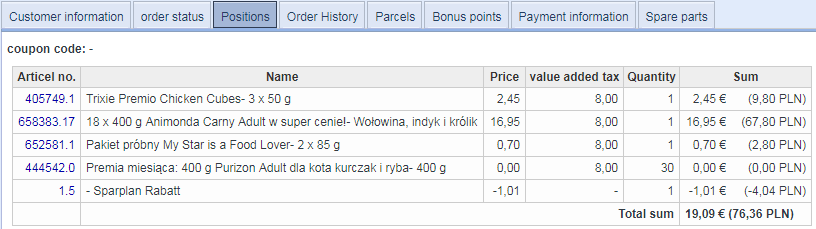

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
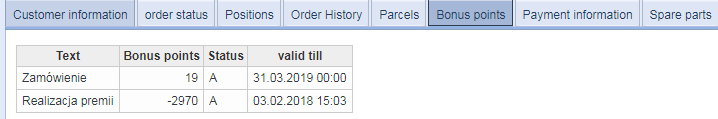

In [110]:
data[data['SCM_N_ORDER_NR'] == 104785147][data.columns[:20]]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_AP_ID,SCM_AS_ID,SCM_MASTER_AP_ID,SCM_IS_ZSP_ORDER,SCM_C_ORDER_STATUS,CTP_N_KEY_CUSTOMER_TYPE,SCM_OCI_LAND,SCM_D_FC_ID,SCM_D_PC_DSP
500432,446892462,104785147,2018-02-16,13:07,8,12941531,0.0000,0.0,0.0000,0.0000,0.0000,0,1,6169,0,L,0,PL,0,0
500433,446892465,104785147,2018-02-16,13:07,8,12941531,22.9995,0.0,2.2659,-2.1732,21.2959,63785,1689351,63785,0,L,0,PL,325,2
500434,446892463,104785147,2018-02-16,13:07,8,12941531,0.0000,0.0,-0.6200,-1.0595,0.0000,64760,2360348,64760,0,L,0,PL,325,2
500435,446892464,104785147,2018-02-16,13:07,8,12941531,3.4571,0.0,0.8010,-0.1053,3.2010,62415,2230004,62415,0,L,0,PL,325,2
500436,446892466,104785147,2018-02-16,13:07,8,12941531,-1.3252,0.0,-1.2271,-1.2271,-1.2271,0,6,42715,0,L,0,PL,0,0
500437,446892461,104785147,2018-02-16,13:07,8,12941531,0.0000,0.0,-32.7000,-38.3581,0.0000,28458,2355050,28458,0,L,0,PL,325,2


<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
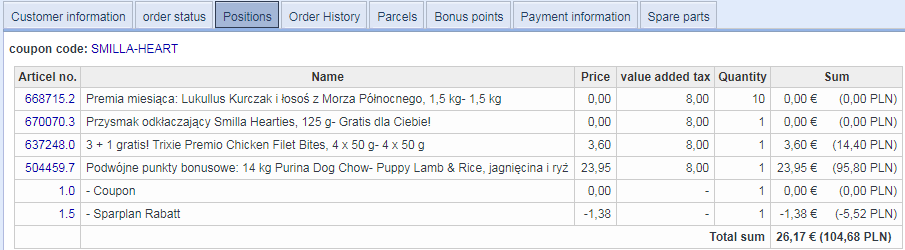

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
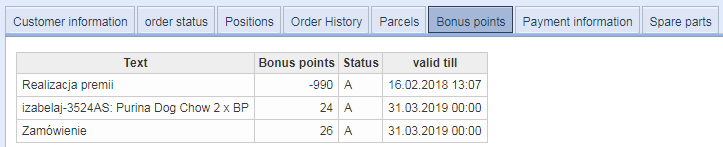

In [111]:
data[data['SCM_N_ORDER_NR'] == 102589132][data.columns[:20]]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_AP_ID,SCM_AS_ID,SCM_MASTER_AP_ID,SCM_IS_ZSP_ORDER,SCM_C_ORDER_STATUS,CTP_N_KEY_CUSTOMER_TYPE,SCM_OCI_LAND,SCM_D_FC_ID,SCM_D_PC_DSP
167931,437558597,102589132,2018-01-15,19:10,8,12941531,-1.3163,0.0,-1.2188,-1.2188,-1.2188,0,6,42715,0,L,0,PL,0,0
167932,437558595,102589132,2018-01-15,19:10,8,12941531,0.0000,0.0,-1.4000,-1.6544,0.0000,75957,2329245,75957,0,L,0,PL,326,2
167933,437558592,102589132,2018-01-15,19:10,8,12941531,0.0000,0.0,-0.7300,-0.9152,0.0000,38956,2329126,38956,0,L,0,PL,326,2
167936,437558596,102589132,2018-01-15,19:10,8,12941531,0.4804,0.0,-0.6552,-0.9072,0.4448,74612,2320466,74612,0,L,0,PL,326,2
167937,437558391,102589132,2018-01-15,19:10,8,12941531,9.0796,0.0,0.9670,0.6854,8.4070,48132,2218073,48132,0,L,0,PL,326,2
167939,437558389,102589132,2018-01-15,19:10,8,12941531,0.0000,0.0,-13.7500,-14.6345,0.0000,70064,2335862,70064,0,L,0,PL,326,2
167940,437558388,102589132,2018-01-15,19:10,8,12941531,5.9570,0.0,0.5957,0.2177,5.5157,62610,2305878,62610,0,L,0,PL,326,2
167941,437558387,102589132,2018-01-15,19:10,8,12941531,0.0000,0.0,-2.6500,-3.0353,0.0000,70091,2329176,70091,0,L,0,PL,326,2
167948,437558593,102589132,2018-01-15,19:10,8,12941531,4.7560,0.0,0.5637,-0.2717,4.4037,67439,2018141,67439,0,L,0,PL,326,2
167949,437558594,102589132,2018-01-15,19:10,8,12941531,0.0000,0.0,0.0000,0.0000,0.0000,0,1,6169,0,L,0,PL,0,0


<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
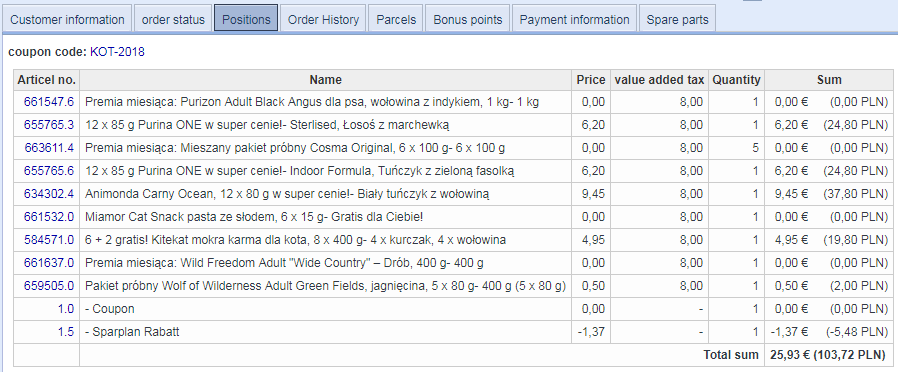

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
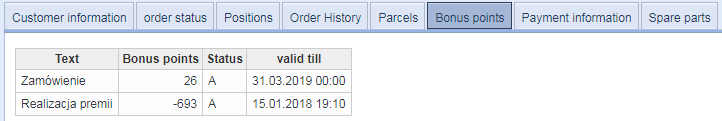

In [112]:
data[data['CUS_N_KEY_CUSTOMER'] == 12941531]['SCM_N_ORDER_NR'].nunique()

70

In [113]:
(data[data['CUS_N_KEY_CUSTOMER'] == 12941531]['SCM_MASTER_AP_ID'] == 6169).sum()

64

#### Customer ID 3011357

In [114]:
data[data['CUS_N_KEY_CUSTOMER'] == 3011357].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
[data[data['CUS_N_KEY_CUSTOMER'] == 3011357].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0]

SCM_N_ORDER_NR
102512559    -0.7844
102512660    -0.0912
102672893    -0.7212
102989942    -2.8547
104068536    -0.6322
106072762    -1.1947
106142646    -1.1691
106142931    -0.2397
106143235    -2.0636
106209541    -2.4643
106209641    -1.1691
106389253    -2.0972
106556141    -2.5336
106706477    -1.8406
106877334   -18.8185
107191865    -5.1233
107451478    -0.9975
107452153    -0.4876
107452445    -0.7051
107452617    -5.1233
107536631   -10.8255
107782572    -1.6495
107782617    -9.3457
Name: SCM_D_FINANCE_CM1, dtype: float64

In [115]:
data[data['SCM_N_ORDER_NR'] == 106877334][data.columns[40:]]

,REL_CM1,REL_CM2,WEEK_NUMBER,MONTH_NUMBER,IS_CM1_NEG_ORDER,ORDER_HAS_COUPON,ORDER_HAS_BP,ORDER_HAS_C+BP,LEAD_PG3_NAME,LEAD_PG4_NAME
817475,1.734219,1.110493,11,3,1,0,0,0,katzenfutter_trockenfutter,royal_canin
817484,-0.173537,-0.261117,11,3,1,0,0,0,katzenfutter_trockenfutter,royal_canin
817485,-1.391925,-2.094354,11,3,1,0,0,0,katzenfutter_trockenfutter,royal_canin
817486,2.148515,1.814970,11,3,1,0,0,0,katzenfutter_trockenfutter,royal_canin
817487,-1.305583,-1.972972,11,3,1,0,0,0,katzenfutter_trockenfutter,royal_canin
817490,-2.729647,-4.226650,11,3,1,0,0,0,katzenfutter_trockenfutter,royal_canin
817491,-0.341569,-0.528891,11,3,1,0,0,0,katzenfutter_trockenfutter,royal_canin
817492,0.168800,-0.227698,11,3,1,0,0,0,katzenfutter_trockenfutter,royal_canin
817495,-0.174561,-0.263806,11,3,1,0,0,0,katzenfutter_trockenfutter,royal_canin
817500,-5.265141,-5.265141,11,3,1,0,0,0,katzenfutter_trockenfutter,royal_canin


In [116]:
data[data['SCM_N_ORDER_NR'] == 107536631][data.columns[40:]]

,REL_CM1,REL_CM2,WEEK_NUMBER,MONTH_NUMBER,IS_CM1_NEG_ORDER,ORDER_HAS_COUPON,ORDER_HAS_BP,ORDER_HAS_C+BP,LEAD_PG3_NAME,LEAD_PG4_NAME
940785,-0.574654,-0.912711,13,3,1,0,0,0,katzenfutter_trockenfutter,royal_canin
940788,-4.298071,-6.825958,13,3,1,0,0,0,katzenfutter_trockenfutter,royal_canin
940789,-4.543828,-7.277170,13,3,1,0,0,0,katzenfutter_trockenfutter,royal_canin
940790,-0.568595,-0.910597,13,3,1,0,0,0,katzenfutter_trockenfutter,royal_canin
940791,-5.269685,-5.269685,13,3,1,0,0,0,katzenfutter_trockenfutter,royal_canin


In [117]:
data[data['SCM_N_ORDER_NR'] == 107782617][data.columns[40:]]

,REL_CM1,REL_CM2,WEEK_NUMBER,MONTH_NUMBER,IS_CM1_NEG_ORDER,ORDER_HAS_COUPON,ORDER_HAS_BP,ORDER_HAS_C+BP,LEAD_PG3_NAME,LEAD_PG4_NAME
975509,-0.776445,-1.768322,13,3,1,0,0,0,katzenfutter_dose,gourmet
975510,-5.263227,-5.263227,13,3,1,0,0,0,katzenfutter_dose,gourmet
975511,-3.105943,-6.333653,13,3,1,0,0,0,katzenfutter_dose,gourmet
975527,-6.211886,-12.420815,13,3,1,0,0,0,katzenfutter_dose,gourmet


#### Customer ID 8746062

In [118]:
data[data['CUS_N_KEY_CUSTOMER'] == 8746062].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
[data[data['CUS_N_KEY_CUSTOMER'] == 8746062].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0]

SCM_N_ORDER_NR
103405524    -5.4938
105750511    -1.2961
106226841    -6.5633
106307702    -6.5133
106336749    -6.7892
106387847    -1.3706
106422272    -1.3706
106458061    -2.1441
107181715    -6.0334
107288193    -0.5606
107581358   -12.6945
Name: SCM_D_FINANCE_CM1, dtype: float64

In [119]:
data[data['SCM_N_ORDER_NR'] == 107581358][data.columns[40:]]

,REL_CM1,REL_CM2,WEEK_NUMBER,MONTH_NUMBER,IS_CM1_NEG_ORDER,ORDER_HAS_COUPON,ORDER_HAS_BP,ORDER_HAS_C+BP,LEAD_PG3_NAME,LEAD_PG4_NAME
955317,-8.874273,-10.215812,13,3,1,1,1,1,katzenfutter_trockenfutter,royal_canin
956941,-1.659513,-1.659513,13,3,1,1,1,1,katzenfutter_trockenfutter,royal_canin
956942,4.187109,3.552127,13,3,1,1,1,1,katzenfutter_trockenfutter,royal_canin
956943,-5.255407,-5.255407,13,3,1,1,1,1,katzenfutter_trockenfutter,royal_canin
956944,-4.013976,-4.537728,13,3,1,1,1,1,katzenfutter_trockenfutter,royal_canin
956945,-10.494372,-11.327877,13,3,1,1,1,1,katzenfutter_trockenfutter,royal_canin
956946,-0.975686,-1.514672,13,3,1,1,1,1,katzenfutter_trockenfutter,royal_canin
956947,-7.797028,-12.105524,13,3,1,1,1,1,katzenfutter_trockenfutter,royal_canin
956948,4.187109,3.552127,13,3,1,1,1,1,katzenfutter_trockenfutter,royal_canin


In [120]:
data[data['SCM_N_ORDER_NR'] == 106336749][data.columns[40:]]

,REL_CM1,REL_CM2,WEEK_NUMBER,MONTH_NUMBER,IS_CM1_NEG_ORDER,ORDER_HAS_COUPON,ORDER_HAS_BP,ORDER_HAS_C+BP,LEAD_PG3_NAME,LEAD_PG4_NAME
747220,-4.011463,-4.568739,10,3,1,1,0,0,katzenfutter_trockenfutter,royal_canin_breed_cat
747221,-5.256459,-5.256459,10,3,1,1,0,0,katzenfutter_trockenfutter,royal_canin_breed_cat
747222,-1.144566,-2.045846,10,3,1,1,0,0,katzenfutter_trockenfutter,royal_canin_breed_cat
747223,-9.180767,-16.409769,10,3,1,1,0,0,katzenfutter_trockenfutter,royal_canin_breed_cat
747232,0.000000,0.000000,10,3,1,1,0,0,katzenfutter_trockenfutter,royal_canin_breed_cat


#### Customer ID 18324859

In [121]:
data[data['CUS_N_KEY_CUSTOMER'] == 18324859].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
[data[data['CUS_N_KEY_CUSTOMER'] == 18324859].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0]

SCM_N_ORDER_NR
106043812   -20.5024
Name: SCM_D_FINANCE_CM1, dtype: float64

In [122]:
data[data['SCM_N_ORDER_NR'] == 106043812][data.columns[:20]]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_AP_ID,SCM_AS_ID,SCM_MASTER_AP_ID,SCM_IS_ZSP_ORDER,SCM_C_ORDER_STATUS,CTP_N_KEY_CUSTOMER_TYPE,SCM_OCI_LAND,SCM_D_FC_ID,SCM_D_PC_DSP
697715,452195960,106043812,2018-03-06,14:14,8,18324859,1.1404,0.0,0.2959,0.0478,1.0559,65187,1909000,65187,0,L,0,PL,326,2
697716,452195955,106043812,2018-03-06,14:14,8,18324859,0.0000,0.0,0.0000,0.0000,0.0000,0,1,6169,0,L,0,PL,0,0
697717,452195958,106043812,2018-03-06,14:14,8,18324859,0.0000,0.0,-21.9000,-22.9574,0.0000,55166,1491012,55166,0,L,0,PL,326,2
697718,452195957,106043812,2018-03-06,14:14,8,18324859,5.8919,0.0,0.6554,0.2931,5.4554,62610,2305878,62610,0,L,0,PL,326,2
697719,452195959,106043812,2018-03-06,14:14,8,18324859,16.1076,0.0,2.2544,0.6607,14.9144,51180,2316068,51180,0,L,0,PL,326,2
697720,452195956,106043812,2018-03-06,14:14,8,18324859,0.0000,0.0,-1.3900,-1.5791,0.0000,50773,2371314,50773,0,L,0,PL,326,2
697721,452195961,106043812,2018-03-06,14:14,8,18324859,5.8919,0.0,0.6554,0.2931,5.4554,62526,2305873,62526,0,L,0,PL,326,2
697722,452195962,106043812,2018-03-06,14:14,8,18324859,-1.1594,0.0,-1.0735,-1.0735,-1.0735,0,6,42715,0,L,0,PL,0,0


#### Customer ID 8660706

In [123]:
data[data['CUS_N_KEY_CUSTOMER'] == 8660706].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()\
[data[data['CUS_N_KEY_CUSTOMER'] == 8660706].groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum() < 0]

SCM_N_ORDER_NR
101782262   -1.4810
103666514   -6.9500
104165372   -7.3193
104303321   -0.4510
104863257   -4.3879
105147757   -0.0594
106093928   -8.4836
107477432   -1.3217
Name: SCM_D_FINANCE_CM2, dtype: float64

In [124]:
data[data['SCM_N_ORDER_NR'] == 106093928][data.columns[:20]]

,SCM_N_ORDER_POS_NR,SCM_N_ORDER_NR,TDT_T_KEY_ORDER_DATE,THR_C_KEY_ORDER_HOUR,SIT_N_KEY_SITE,CUS_N_KEY_CUSTOMER,SCM_SALES_BMF,SCM_SALES_CANCEL_BMF,SCM_D_FINANCE_CM1,SCM_D_FINANCE_CM2,SCM_D_ORIG_FINANCE_ORDER_NET,SCM_AP_ID,SCM_AS_ID,SCM_MASTER_AP_ID,SCM_IS_ZSP_ORDER,SCM_C_ORDER_STATUS,CTP_N_KEY_CUSTOMER_TYPE,SCM_OCI_LAND,SCM_D_FC_ID,SCM_D_PC_DSP
706776,452405277,106093928,2018-03-07,08:46,8,8660706,0.4751,0.0,-0.6600,-1.5781,0.4400,74612,2320466,74612,0,L,0,PL,325,2
706779,452405279,106093928,2018-03-07,08:46,8,8660706,0.0000,0.0,0.0000,0.0000,0.0000,0,1,6169,0,L,0,PL,0,0
706799,452405275,106093928,2018-03-07,08:46,8,8660706,5.8919,0.0,1.1954,-1.0617,5.4554,67821,1787456,67821,0,L,0,PL,325,2
706800,452405274,106093928,2018-03-07,08:46,8,8660706,7.7925,0.0,1.4352,-0.7317,7.2152,67907,1901788,67907,0,L,0,PL,325,2
706801,452405276,106093928,2018-03-07,08:46,8,8660706,0.0000,0.0,-1.3900,-1.7679,0.0000,50773,2371314,50773,0,L,0,PL,325,2
706802,452405278,106093928,2018-03-07,08:46,8,8660706,14.2070,0.0,1.5946,-2.5523,13.1546,67826,1906225,67826,0,L,0,PL,325,2
706803,452405280,106093928,2018-03-07,08:46,8,8660706,-0.8553,0.0,-0.7919,-0.7919,-0.7919,0,6,42715,0,L,0,PL,0,0


### Behaviours:
- Bonuspoints and coupons applying with SP discount
- Bad CM1 products (Royal Canin, Gourmet...) getting even worse with coupons and SP discount

### Working on renewal logic and eligibility

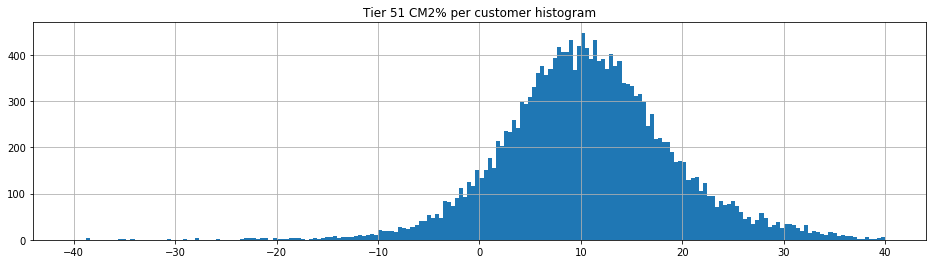

count    19313.000000
mean        10.758856
std          8.509282
min        -66.274932
25%          5.576580
50%         10.446357
75%         15.624358
max         60.353858
dtype: float64

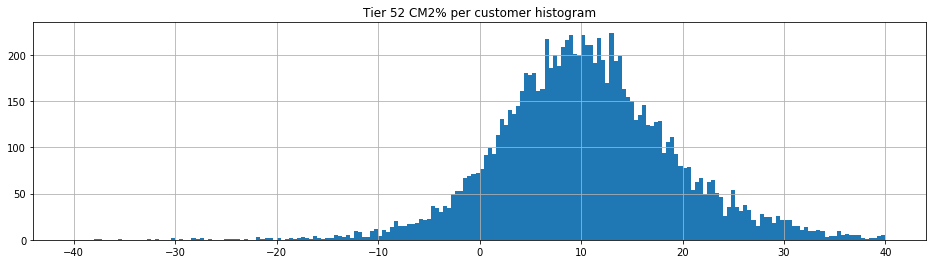

count    10116.000000
mean        10.507584
std          8.990869
min        -87.705102
25%          5.059679
50%         10.184240
75%         15.658166
max         53.451324
dtype: float64

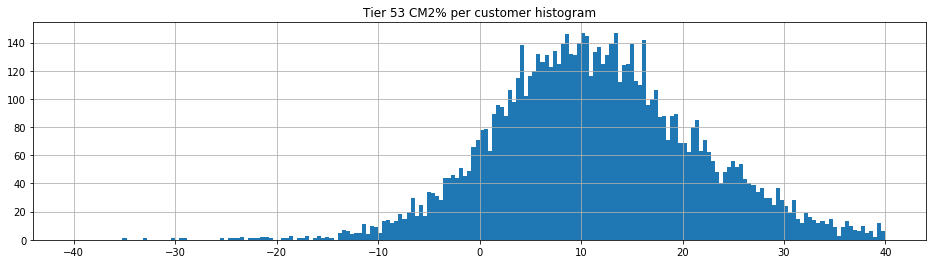

count    8194.000000
mean       11.618187
std        10.155728
min       -45.681932
25%         4.835207
50%        11.047207
75%        17.748754
max        66.264288
dtype: float64

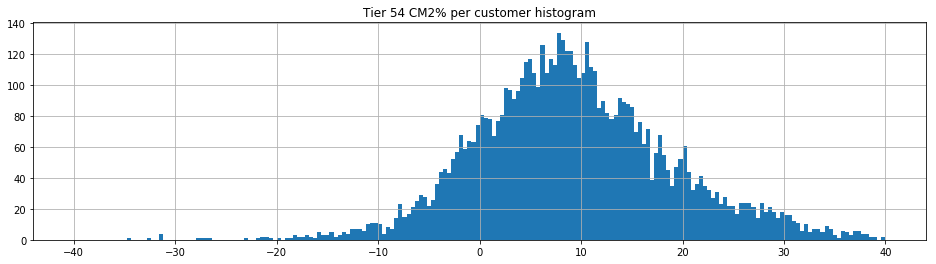

count    6334.000000
mean        9.385407
std        10.273946
min      -120.235020
25%         2.984624
50%         8.644790
75%        15.016917
max        55.105450
dtype: float64

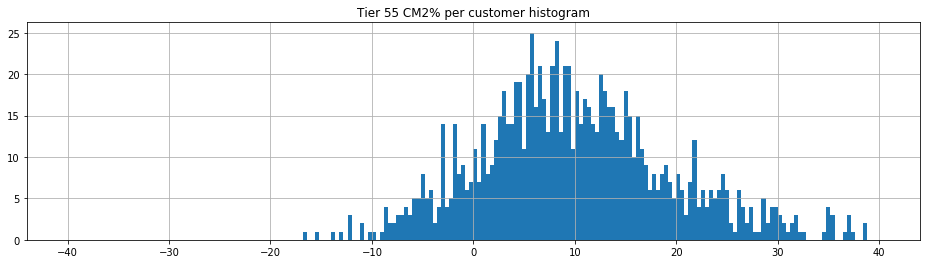

count    995.000000
mean      10.175109
std        9.893787
min      -16.711825
25%        3.767230
50%        9.223332
75%       15.434306
max       52.417087
dtype: float64

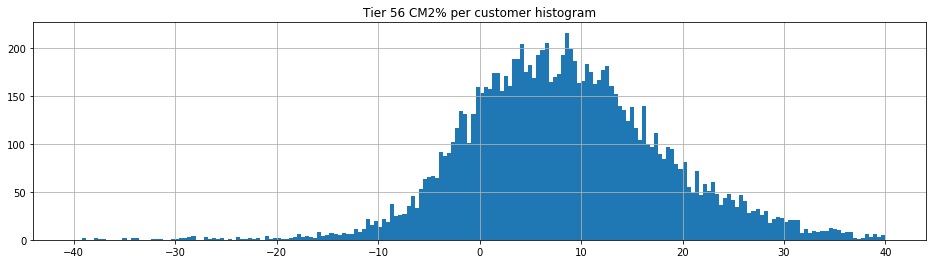

count    11033.000000
mean         8.473605
std         10.536354
min       -126.492217
25%          1.873298
50%          8.023979
75%         14.457064
max         55.768118
dtype: float64

In [125]:
for tq in ztq:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    cm2_per_cust = data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_FINANCE_CM2'].sum() /\
    data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_ORIG_FINANCE_ORDER_NET'].sum() * 100
    plt.figure(figsize=(16,4))
    cm2_per_cust.hist(bins=200, range=(-40, 40))
    title = 'Tier ' + str(tq) + ' CM2% per customer histogram'
    plt.title(title)
    plt.show()
    display(cm2_per_cust.describe())

In [126]:
cm2_thresholds = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
cm2_thres_df = pd.DataFrame(columns=['ZTQ_ID', 'CM2%_threshold', 'eligibles'] )

for tq in ztq:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    cm2_per_cust = data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_FINANCE_CM2'].sum() /\
    data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_ORIG_FINANCE_ORDER_NET'].sum() * 100
    
    for thres in cm2_thresholds:
        cm2_per_cust[cm2_per_cust > thres]
        cust_cm2 = cm2_per_cust[cm2_per_cust > thres].index.values
        row_ = [tq, thres, len(cust_cm2)]
        row_ = pd.DataFrame([row_], columns=cm2_thres_df.columns)
        cm2_thres_df = pd.concat([cm2_thres_df, row_], ignore_index=True)

Total customers in Tier  51 :  19313
Total customers in Tier  52 :  10116


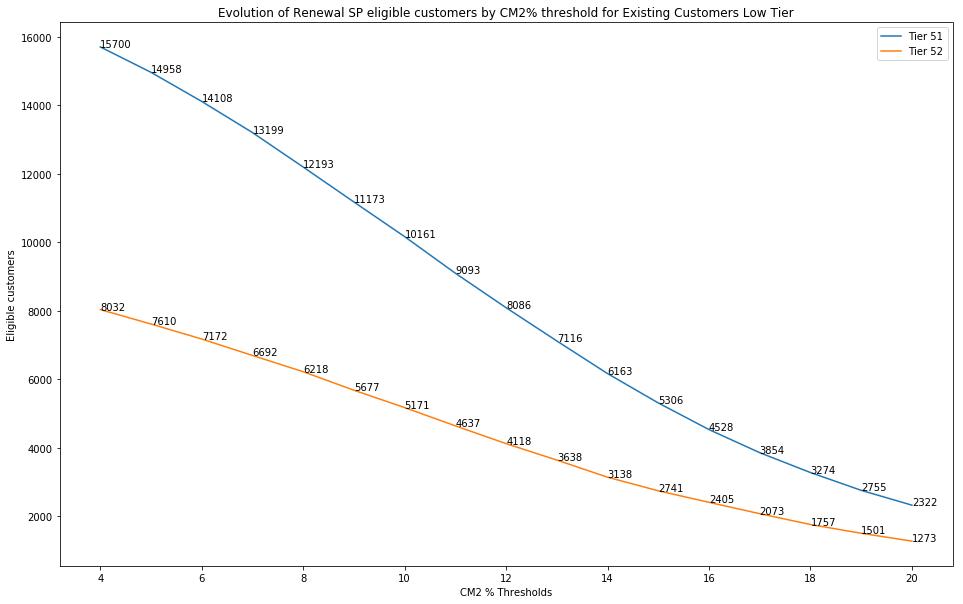

In [127]:
for tq in ztq[:2]:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    cm2_per_cust = data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_FINANCE_CM2'].sum() /\
    data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_ORIG_FINANCE_ORDER_NET'].sum() * 100
    print('Total customers in Tier ', tq, ': ', len(cm2_per_cust))
    
plt.figure(figsize=(16, 10))

for tq in ztq[:2]:
    thres_data = cm2_thres_df[cm2_thres_df['ZTQ_ID'] == tq]
    plt.plot(thres_data['CM2%_threshold'], thres_data['eligibles'])
    
    ax = plt.gca()
    for x, y in list(zip(thres_data['CM2%_threshold'], thres_data['eligibles'])):
        ax.annotate(str(y), xy=(x, y))
    
plt.title('Evolution of Renewal SP eligible customers by CM2% threshold for Existing Customers Low Tier')
plt.xlabel('CM2 % Thresholds')
plt.ylabel('Eligible customers')
plt.legend(['Tier 51', 'Tier 52'])
plt.show()

Total customers in Tier  53 :  8194
Total customers in Tier  54 :  6334


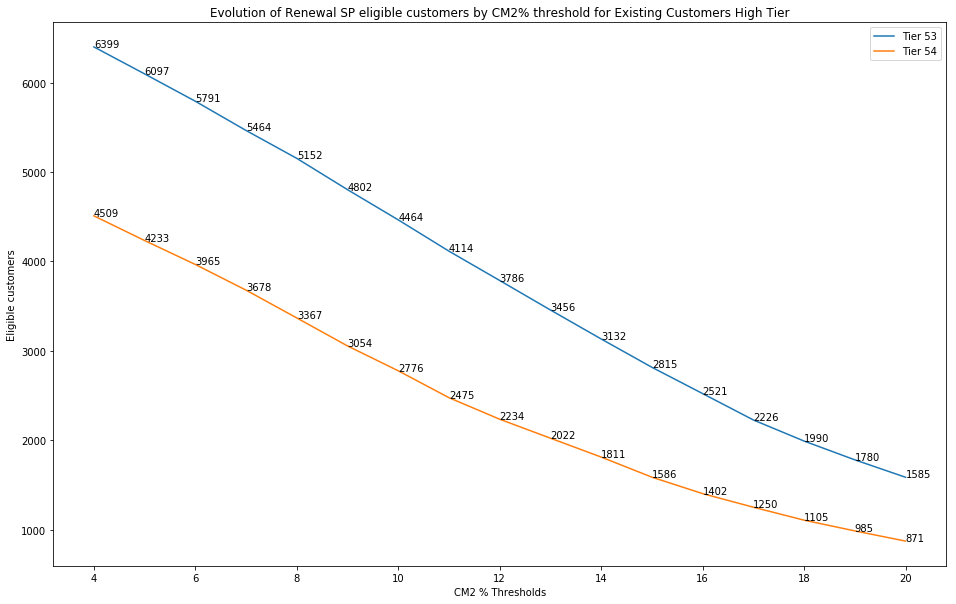

In [128]:
for tq in ztq[2:4]:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    cm2_per_cust = data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_FINANCE_CM2'].sum() /\
    data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_ORIG_FINANCE_ORDER_NET'].sum() * 100
    print('Total customers in Tier ', tq, ': ', len(cm2_per_cust))

plt.figure(figsize=(16, 10))

for tq in ztq[2:4]:
    thres_data = cm2_thres_df[cm2_thres_df['ZTQ_ID'] == tq]
    plt.plot(thres_data['CM2%_threshold'], thres_data['eligibles'])
    
    ax = plt.gca()
    for x, y in list(zip(thres_data['CM2%_threshold'], thres_data['eligibles'])):
        ax.annotate(str(y), xy=(x, y))
    
plt.title('Evolution of Renewal SP eligible customers by CM2% threshold for Existing Customers High Tier')
plt.xlabel('CM2 % Thresholds')
plt.ylabel('Eligible customers')
plt.legend(['Tier 53', 'Tier 54'])
plt.show()

Total customers in Tier  55 :  995
Total customers in Tier  56 :  11033


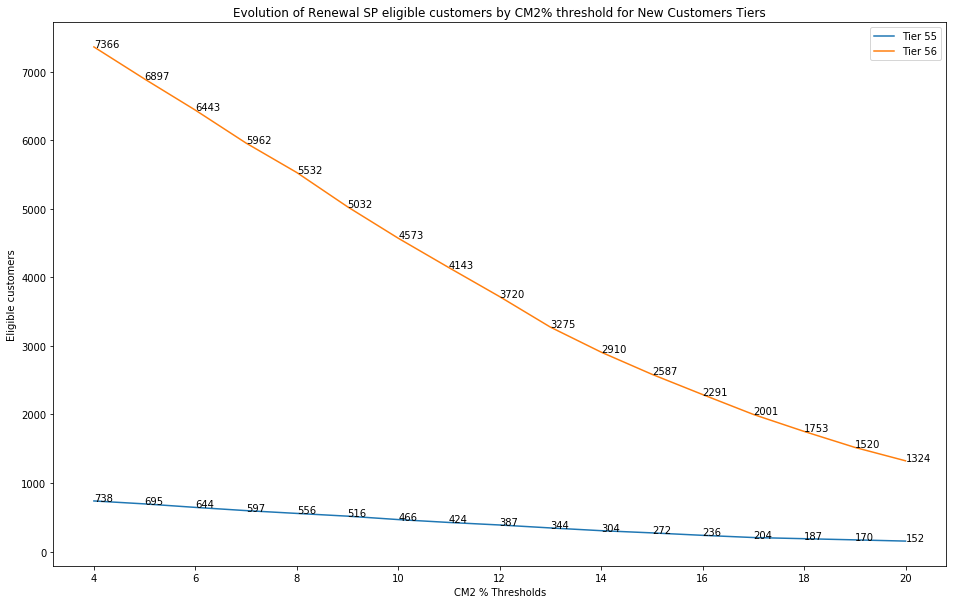

In [129]:
for tq in ztq[4:6]:
    data_tier = data[data['CZP_ZTQ_ID'] == tq]
    cm2_per_cust = data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_FINANCE_CM2'].sum() /\
    data_tier.groupby('CUS_N_KEY_CUSTOMER')['SCM_D_ORIG_FINANCE_ORDER_NET'].sum() * 100
    print('Total customers in Tier ', tq, ': ', len(cm2_per_cust))

plt.figure(figsize=(16, 10))

for tq in ztq[4:6]:
    thres_data = cm2_thres_df[cm2_thres_df['ZTQ_ID'] == tq]
    plt.plot(thres_data['CM2%_threshold'], thres_data['eligibles'])
    
    ax = plt.gca()
    for x, y in list(zip(thres_data['CM2%_threshold'], thres_data['eligibles'])):
        ax.annotate(str(y), xy=(x, y))
    
plt.title('Evolution of Renewal SP eligible customers by CM2% threshold for New Customers Tiers')
plt.xlabel('CM2 % Thresholds')
plt.ylabel('Eligible customers')
plt.legend(['Tier 55', 'Tier 56'])
plt.show()

In [130]:
sp_customers = pd.DataFrame(columns=['CUSTOMER_ID', 'TIER', 'ORDERS', 'SALES', 'NET_SALES', 'BASKET_AVG', 'CM1', 'CM1_AVG',
                                    'CM1%', '%_NEG_CM1_ORD', 'LOSS_IN_CM1', 'CM2', 'CM2_AVG',
                                    'CM2%', '%_NEG_CM2_ORD', 'LOSS_IN_CM2'])

for cus in data['CUS_N_KEY_CUSTOMER'].unique():
    cus_data = data[data['CUS_N_KEY_CUSTOMER'] == cus]
    tier = cus_data['CZP_ZTQ_ID'].unique()
    orders = cus_data['SCM_N_ORDER_NR'].nunique()
    sales = cus_data['SCM_SALES_BMF'].sum() - cus_data['SCM_SALES_CANCEL_BMF'].sum() 
    net_sales = cus_data['SCM_D_ORIG_FINANCE_ORDER_NET'].sum()
    basket_avg = sales / orders
    cm1 = cus_data['SCM_D_FINANCE_CM1'].sum()
    cm1_avg = cm1 / orders
    cm1_perc = cm1 / net_sales * 100
    neg_cm1_orders = len(cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
    [cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0].index.values)
    perc_neg_cm1_orders = neg_cm1_orders / orders * 100
    total_loss_cm1 = cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()\
                    [cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum() < 0].sum()
    cm2 = cus_data['SCM_D_FINANCE_CM2'].sum()
    cm2_avg = cm2 / orders
    cm2_perc = cm2 / net_sales * 100
    neg_cm2_orders = len(cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()\
    [cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum() < 0].index.values)
    perc_neg_cm2_orders = neg_cm2_orders / orders * 100
    total_loss_cm2 = cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()\
                    [cus_data.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum() < 0].sum()
    row_ = [cus, tier, orders, sales, net_sales, basket_avg, cm1, cm1_avg, cm1_perc, perc_neg_cm1_orders, total_loss_cm1,
           cm2, cm2_avg, cm2_perc, perc_neg_cm2_orders, total_loss_cm2]
    row_ = pd.DataFrame([row_], columns=sp_customers.columns)
    sp_customers = pd.concat([sp_customers, row_], ignore_index=True)

In [131]:
sp_customers.round(2)

,CUSTOMER_ID,TIER,ORDERS,SALES,NET_SALES,BASKET_AVG,CM1,CM1_AVG,CM1%,%_NEG_CM1_ORD,LOSS_IN_CM1,CM2,CM2_AVG,CM2%,%_NEG_CM2_ORD,LOSS_IN_CM2
0,16634160,[53],3,179.88,159.90,59.96,37.86,12.62,23.68,0.0,0.00,23.61,7.87,14.77,0.00,0.00
1,3964305,[51],2,204.05,184.36,102.03,38.71,19.35,21.00,0.0,0.00,11.53,5.76,6.25,0.00,0.00
2,13844440,[51],3,237.66,210.01,79.22,59.27,19.76,28.22,0.0,0.00,35.06,11.69,16.69,0.00,0.00
3,10242699,[51],1,39.00,35.05,39.00,9.88,9.88,28.18,0.0,0.00,5.77,5.77,16.45,0.00,0.00
4,7573771,[51],7,280.85,249.93,40.12,55.43,7.92,22.18,0.0,0.00,26.74,3.82,10.70,14.29,-0.90
5,17824889,[56],1,35.88,33.22,35.88,5.38,5.38,16.19,0.0,0.00,2.46,2.46,7.41,0.00,0.00
6,17377222,[56],3,94.42,84.61,31.47,21.55,7.18,25.47,0.0,0.00,11.63,3.88,13.74,0.00,0.00
7,17059126,[53],4,297.89,275.83,74.47,43.38,10.84,15.73,0.0,0.00,17.82,4.46,6.46,0.00,0.00
8,17638999,[51],6,212.03,185.83,35.34,54.16,9.03,29.15,0.0,0.00,33.94,5.66,18.27,0.00,0.00
9,15274905,[51],3,77.49,68.25,25.83,23.84,7.95,34.93,0.0,0.00,12.86,4.29,18.84,0.00,0.00


In [133]:
#sp_customers.round(2).to_csv('pl_customers_q1.csv', sep=';', index=False, encoding='utf-8')